# **IDENTIFIKASI MASALAH**

Eksperimen dengan nama **"recommender_system_test"** dilakukan oleh pendahulu kami di salah satu toko daring internasional dalam rangka menguji perubahan yang terkait dengan pengenalan sistem rekomendasi yang telah ditingkatkan di aplikasi toko daring tersebut. Meskipun eksperimen ini memiliki spesifikasi teknis yang cukup lengkap, namun masih terdapat beberapa masalah yang perlu diidentifikasi secara komprehensif dan mendetail. Pendahulu kami hanya meninggalkan hasil eksperimen tanpa memberikan data atau statistik yang lebih terperinci. Kami tidak memiliki informasi tentang berapa banyak peningkatan yang sebenarnya telah terjadi dalam hal konversi yang dilakukan oleh konsumen, mulai dari tayangan halaman produk, aktivitas penambahan item ke keranjang belanja, dan pembelian (**product_page → product_cart → purchase**). Oleh karena itu, sulit untuk mengevaluasi apakah perubahan yang diuji berhasil atau tidak.

# **TUJUAN ANALISIS**

Tujuan analisis eksperimen **"recommender_system_test"** adalah untuk menguji efektivitas perubahan yang telah diterapkan pada sistem rekomendasi dalam **meningkatkan konversi dan aktivitas pengguna** dari suatu aplikasi toko daring internasional.

Secara lebih rinci, tujuan eksperimen ini adalah sebagai berikut:
   * **Menguji Efek Dari Perubahan Sistem Rekomendasi**: Eksperimen bertujuan untuk menguji efek dari perubahan yang telah diterapkan pada sistem rekomendasi toko daring. Hal ini dilakukan untuk memastikan bahwa perubahan tersebut benar-benar meningkatkan pengalaman pengguna dan aktivitas mereka di platform
   * **Mengukur Konversi ke Tayangan Halaman Produk (product page)**: Salah satu tujuan utama adalah meningkatkan konversi pengguna dari tampilan beranda ke tayangan halaman produk. Hal ini diukur dalam bentuk peristiwa atau event "product_page." Eksperimen ini ingin memastikan bahwa lebih banyak pengguna yang melihat produk-produk yang ditawarkan oleh toko daring.
   * **Meningkatkan Aktivitas Penambahan Item ke Keranjang Belanja (product cart)**: Selanjutnya, eksperimen ini bertujuan untuk meningkatkan aktivitas penambahan item ke keranjang belanja, yang diukur dalam bentuk event "product_cart." Hal ini mengindikasikan minat pengguna untuk membeli produk-produk yang mereka pilih.
   * **Meningkatkan Tingkat Pembelian (purchase)**: Tujuan akhir adalah meningkatkan tingkat pembelian (event "purchase"). Eksperimen ini berharap bahwa perubahan pada sistem rekomendasi akan mendorong pengguna untuk lebih sering menyelesaikan pembelian, yang pada gilirannya akan meningkatkan pendapatan toko daring.
   * **Peningkatan Minimal 10% di Setiap Tahapan Corong**: Penting untuk dicatat bahwa eksperimen ini menetapkan target peningkatan minimal sebesar 10% pada setiap tahapan corong, yaitu dari tayangan halaman produk ke penambahan item ke keranjang belanja, dan dari situ ke pembelian. Ini adalah indikator keberhasilan utama eksperimen.

In [1]:
pip install xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# **TAHAP 1 : MEMUAT INFORMASI UMUM**

In [2]:
# Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import joblib
import plotly.graph_objs as go
import plotly.express as px
from datetime import datetime
from scipy import stats as st

## **DATASET KALENDER_EVENT**

In [3]:
# Memuat Dataset kalender event

kalender_event = pd.read_excel('/kaggle/input/ab-testing-recommender-system-test/ab_project_marketing_events_us.xlsx')
kalender_event

name                   regions   start_dt  \
0           Christmas&New Year Promo             EU, N.America 2020-12-25   
1       St. Valentine's Day Giveaway  EU, CIS, APAC, N.America 2020-02-14   
2             St. Patric's Day Promo             EU, N.America 2020-03-17   
3                       Easter Promo  EU, CIS, APAC, N.America 2020-04-12   
4                  4th of July Promo                 N.America 2020-07-04   
5          Black Friday Ads Campaign  EU, CIS, APAC, N.America 2020-11-26   
6             Chinese New Year Promo                      APAC 2020-01-25   
7   Labor day (May 1st) Ads Campaign             EU, CIS, APAC 2020-05-01   
8    International Women's Day Promo             EU, CIS, APAC 2020-03-08   
9    Victory Day CIS (May 9th) Event                       CIS 2020-05-09   
10         CIS New Year Gift Lottery                       CIS 2020-12-30   
11     Dragon Boat Festival Giveaway                      APAC 2020-06-25   
12           Single's Day Gift Promo                      APAC 2020-11-11   
13             Chinese Moon Festival                      APAC 2020-10-01   

    finish_dt  
0  2021-01-03  
1  2020-02-16  
2  2020-03-19  
3  2020-04-19  
4  2020-07-11  
5  2020-12-01  
6  2020-02-07  
7  2020-05-03  
8  2020-03-10  
9  2020-05-11  
10 2021-01-07  
11 2020-07-01  
12 2020-11-12  
13 2020-10-07

In [4]:
# Pisahkan setiap kode negara menjadi satu baris dalam kolom yang berbeda
kalender_event['regions'] = kalender_event['regions'].str.split(', ')

# Buat DataFrame baru dengan multi-indeks
kalender_event = kalender_event.explode('regions')

# Tampilkan hasilnya
kalender_event

name    regions   start_dt  finish_dt
0           Christmas&New Year Promo         EU 2020-12-25 2021-01-03
0           Christmas&New Year Promo  N.America 2020-12-25 2021-01-03
1       St. Valentine's Day Giveaway         EU 2020-02-14 2020-02-16
1       St. Valentine's Day Giveaway        CIS 2020-02-14 2020-02-16
1       St. Valentine's Day Giveaway       APAC 2020-02-14 2020-02-16
1       St. Valentine's Day Giveaway  N.America 2020-02-14 2020-02-16
2             St. Patric's Day Promo         EU 2020-03-17 2020-03-19
2             St. Patric's Day Promo  N.America 2020-03-17 2020-03-19
3                       Easter Promo         EU 2020-04-12 2020-04-19
3                       Easter Promo        CIS 2020-04-12 2020-04-19
3                       Easter Promo       APAC 2020-04-12 2020-04-19
3                       Easter Promo  N.America 2020-04-12 2020-04-19
4                  4th of July Promo  N.America 2020-07-04 2020-07-11
5          Black Friday Ads Campaign         EU 2020-11-26 2020-12-01
5          Black Friday Ads Campaign        CIS 2020-11-26 2020-12-01
5          Black Friday Ads Campaign       APAC 2020-11-26 2020-12-01
5          Black Friday Ads Campaign  N.America 2020-11-26 2020-12-01
6             Chinese New Year Promo       APAC 2020-01-25 2020-02-07
7   Labor day (May 1st) Ads Campaign         EU 2020-05-01 2020-05-03
7   Labor day (May 1st) Ads Campaign        CIS 2020-05-01 2020-05-03
7   Labor day (May 1st) Ads Campaign       APAC 2020-05-01 2020-05-03
8    International Women's Day Promo         EU 2020-03-08 2020-03-10
8    International Women's Day Promo        CIS 2020-03-08 2020-03-10
8    International Women's Day Promo       APAC 2020-03-08 2020-03-10
9    Victory Day CIS (May 9th) Event        CIS 2020-05-09 2020-05-11
10         CIS New Year Gift Lottery        CIS 2020-12-30 2021-01-07
11     Dragon Boat Festival Giveaway       APAC 2020-06-25 2020-07-01
12           Single's Day Gift Promo       APAC 2020-11-11 2020-11-12
13             Chinese Moon Festival       APAC 2020-10-01 2020-10-07

In [5]:
# mempelajari informasi umum

kalender_event.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       29 non-null     object        
 1   regions    29 non-null     object        
 2   start_dt   29 non-null     datetime64[ns]
 3   finish_dt  29 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 1.1+ KB


In [6]:
# Mengubah tipe data kolom 'start_dt' dan 'finish_dt' menjadi datetime
kalender_event['start_dt'] = pd.to_datetime(kalender_event['start_dt'])
kalender_event['finish_dt'] = pd.to_datetime(kalender_event['finish_dt'])

# Mengecek tipe data setelah perubahan
kalender_event.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       29 non-null     object        
 1   regions    29 non-null     object        
 2   start_dt   29 non-null     datetime64[ns]
 3   finish_dt  29 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 1.1+ KB


In [7]:
# Identifikasi jumlah event pemasaran yang unik selama 2020

print("Variasi Event Pemasaran Selama Tahun 2020 Adalah Sebanyak :", kalender_event['name'].nunique(), "Event")

Variasi Event Pemasaran Selama Tahun 2020 Adalah Sebanyak : 14 Event


**Terdapat sekitar 14 event pemasaran yang tercatat dalam kalender selama tahun 2020**

## **DATASET ALL_NEW_USER**

In [11]:
# Memuat Dataset all customer

all_new_user = pd.read_excel('/kaggle/input/ab-testing-recommender-system-test/final_ab_new_users_upd_us.xlsx')
all_new_user

user_id first_date     region   device
0      D72A72121175D8BE 2020-12-07         EU       PC
1      F1C668619DFE6E65 2020-12-07  N.America  Android
2      2E1BF1D4C37EA01F 2020-12-07         EU       PC
3      50734A22C0C63768 2020-12-07         EU   iPhone
4      E1BDDCE0DAFA2679 2020-12-07  N.America   iPhone
...                 ...        ...        ...      ...
58698  1DB53B933257165D 2020-12-20         EU  Android
58699  538643EB4527ED03 2020-12-20         EU      Mac
58700  7ADEE837D5D8CBBD 2020-12-20         EU       PC
58701  1C7D23927835213F 2020-12-20         EU   iPhone
58702  8F04273BB2860229 2020-12-20         EU  Android

[58703 rows x 4 columns]

In [12]:
# mempelajari informasi umum

all_new_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


In [13]:
# Mengubah tipe data kolom 'first_date' menjadi datetime
all_new_user['first_date'] = pd.to_datetime(all_new_user['first_date'])

# Mengecek tipe data setelah perubahan
all_new_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


In [14]:
# Mengidentifikasi tanggal terlama (tanggal awal)
tanggal_terlama = all_new_user['first_date'].min()

# Mengidentifikasi tanggal terbaru (tanggal akhir)
tanggal_terbaru = all_new_user['first_date'].max()

# Menampilkan hasil
print("Tanggal Terlama (Tanggal Awal):", tanggal_terlama)
print("Tanggal Terbaru (Tanggal Akhir):", tanggal_terbaru)

Tanggal Terlama (Tanggal Awal): 2020-12-07 00:00:00
Tanggal Terbaru (Tanggal Akhir): 2020-12-23 00:00:00


**Temuan 1 :**

Sesuai spesifikasi teknis, maka eksperimen direncanakan untuk berlangsung **selama 14 hari**, terhitung dari tanggal **07-12-2020 hingga 21-12-2020**. Namun dataset yang digunakan **mencakup data hingga tanggal 23-12-2020**, yang artinya **cakupan periodenya lebih panjang daripada periode eksperimen**. Hal ini dapat memengaruhi hasil eksperimen, karena data di luar periode eksperimen seharusnya tidak termasuk dalam analisis.

**Kami akan mengambil baris data hanya untuk cakupan periode sesuai spesifikasi teknis**

In [15]:
# Mengambil seluruh baris yang memenuhi kondisi tanggal antara 07-12-2020 dan 21-12-2020

all_new_user_fil = all_new_user[(all_new_user['first_date'] >= '2020-12-07') & (all_new_user['first_date'] <= '2020-12-21')]
all_new_user_fil

user_id first_date     region   device
0      D72A72121175D8BE 2020-12-07         EU       PC
1      F1C668619DFE6E65 2020-12-07  N.America  Android
2      2E1BF1D4C37EA01F 2020-12-07         EU       PC
3      50734A22C0C63768 2020-12-07         EU   iPhone
4      E1BDDCE0DAFA2679 2020-12-07  N.America   iPhone
...                 ...        ...        ...      ...
58698  1DB53B933257165D 2020-12-20         EU  Android
58699  538643EB4527ED03 2020-12-20         EU      Mac
58700  7ADEE837D5D8CBBD 2020-12-20         EU       PC
58701  1C7D23927835213F 2020-12-20         EU   iPhone
58702  8F04273BB2860229 2020-12-20         EU  Android

[53440 rows x 4 columns]

In [16]:
# Identifikasi pengurangan jumlah baris setelah penyesuaian data
print("Terjadi pengurangan baris data sebanyak :", len(all_new_user) - len(all_new_user_fil), "baris data")

Terjadi pengurangan baris data sebanyak : 5263 baris data


In [17]:
# Identifikasi jumlah pengguna baru

print("Jumlah Pengguna Baru Yang Mendaftar Selama 7-12-2020 Hingga 23-12-2020 Sebanyak :", all_new_user['user_id'].nunique(), "Pengguna")
print()
print("Jumlah Pengguna Baru Yang Mendaftar Setelah Penyesuaian Periode :", all_new_user_fil['user_id'].nunique(), "Pengguna")

Jumlah Pengguna Baru Yang Mendaftar Selama 7-12-2020 Hingga 23-12-2020 Sebanyak : 58703 Pengguna

Jumlah Pengguna Baru Yang Mendaftar Setelah Penyesuaian Periode : 53440 Pengguna


In [18]:
# Identifikasi jumlah negara untuk seluruh user

print("Variansi Jumlah Negara Untuk Seluruh User Tercatat Sebanyak :", all_new_user_fil['region'].nunique(), "Negara")
print("Sebagai Berikut :", all_new_user_fil['region'].unique())

Variansi Jumlah Negara Untuk Seluruh User Tercatat Sebanyak : 4 Negara
Sebagai Berikut : ['EU' 'N.America' 'APAC' 'CIS']


In [19]:
# Identifikasi jumlah perangkat yang digunakan oleh semua user

print("Variasi Jumlah Perangkat Yang Digunakan Oleh Seluruh User Sebanyak :", all_new_user_fil['device'].nunique(), "Perangkat")
print("Sebagai Berikut :", all_new_user_fil['device'].unique())

Variasi Jumlah Perangkat Yang Digunakan Oleh Seluruh User Sebanyak : 4 Perangkat
Sebagai Berikut : ['PC' 'Android' 'iPhone' 'Mac']


**Kesimpulan :**

Dataset kami telah mencakup data dari periode **07 Desember 2020** hingga **21 Desember 2020**, dengan jumlah pengguna yang terhitung adalah sebanyak **53.440 pengguna baru**.

Dalam penggunaan platform kami, pengguna-pengguna ini menggunakan berbagai jenis perangkat, yaitu **PC, Android, iPhone**, dan **Mac**, dengan total variasi sebanyak 4 jenis perangkat tersebut. Selain itu, pengguna-pengguna ini juga berasal dari **4 negara** berbeda, yakni **Uni Eropa (EU), Amerika Utara (N.America), Asia Pasifik (APAC)**, dan **Negara-Negara Persemakmuran Independen (CIS)**. Semua informasi ini memberikan gambaran tentang keragaman pengguna platform daring perusahaan kami, yang bersifat global, baik dalam hal perangkat yang digunakan maupun asal negara mereka.

In [20]:
# memuat dataset baru setelah penyesuaian

all_new_user_fil

user_id first_date     region   device
0      D72A72121175D8BE 2020-12-07         EU       PC
1      F1C668619DFE6E65 2020-12-07  N.America  Android
2      2E1BF1D4C37EA01F 2020-12-07         EU       PC
3      50734A22C0C63768 2020-12-07         EU   iPhone
4      E1BDDCE0DAFA2679 2020-12-07  N.America   iPhone
...                 ...        ...        ...      ...
58698  1DB53B933257165D 2020-12-20         EU  Android
58699  538643EB4527ED03 2020-12-20         EU      Mac
58700  7ADEE837D5D8CBBD 2020-12-20         EU       PC
58701  1C7D23927835213F 2020-12-20         EU   iPhone
58702  8F04273BB2860229 2020-12-20         EU  Android

[53440 rows x 4 columns]

## **DATASET ALL_EVENT**

In [22]:
# Memuat Dataset All Event

all_event = pd.read_excel('/kaggle/input/ab-testing-recommender-system-test/final_ab_events_upd_us.xlsx')
all_event.sort_values(by=['user_id', 'event_dt'], ascending=True)

user_id            event_dt    event_name  details
180639    84926537800408 2020-12-18 16:52:56  product_page      NaN
332084    84926537800408 2020-12-18 16:52:56         login      NaN
340151    84926537800408 2020-12-19 08:46:43         login      NaN
185958    84926537800408 2020-12-19 08:46:45  product_page      NaN
212504    84926537800408 2020-12-22 15:41:42  product_page      NaN
...                  ...                 ...           ...      ...
387380  FFFFE36C0F6E92DF 2020-12-23 05:09:13         login      NaN
108384  FFFFE36C0F6E92DF 2020-12-23 05:09:15  product_cart      NaN
405434  FFFFE36C0F6E92DF 2020-12-26 09:25:03         login      NaN
114347  FFFFE36C0F6E92DF 2020-12-26 09:25:04  product_cart      NaN
229174  FFFFE36C0F6E92DF 2020-12-26 09:25:04  product_page      NaN

[423761 rows x 4 columns]

In [23]:
# Identifikasi jumlah pengguna baru

print("Jumlah Pengguna Baru Yang Melakukan Aktifitas Sepanjang Periode 07-12-2020 Hingga 30-12-2020 Sebanyak :", all_event['user_id'].nunique(), "Pengguna")

Jumlah Pengguna Baru Yang Melakukan Aktifitas Sepanjang Periode 07-12-2020 Hingga 30-12-2020 Sebanyak : 58703 Pengguna


**Temuan 2 :**

Jumlah pengguna baru dalam dataset ini mencapai **58.703 user**. Namun, perlu diperhatikan bahwa jumlah ini masih mencakup pengguna yang mendaftar di luar jangka waktu yang seharusnya, yaitu dari tanggal **07-12-2020** hingga **21-12-2020**, sesuai dengan spesifikasi teknis.

In [24]:
# mempelajari informasi umum

all_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


In [25]:
# Mengubah tipe data kolom 'event_dt' menjadi datetime
all_event['event_dt'] = pd.to_datetime(all_event['event_dt'])

# mempelajari informasi umum
all_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


In [26]:
# Mengidentifikasi tanggal terlama (tanggal awal)
tanggal_terlama = all_event['event_dt'].min()

# Mengidentifikasi tanggal terbaru (tanggal akhir)
tanggal_terbaru = all_event['event_dt'].max()

# Menampilkan hasil
print("Tanggal Terlama (Tanggal Awal):", tanggal_terlama)
print("Tanggal Terbaru (Tanggal Akhir):", tanggal_terbaru)

Tanggal Terlama (Tanggal Awal): 2020-12-07 00:00:33
Tanggal Terbaru (Tanggal Akhir): 2020-12-30 23:36:33


**Temuan 3 :**

Dataset kami memuat periode analisa untuk aktifitas user tercatat **sepanjang periode 07-12-2020 hingga 30-12-2020**. Hal ini telah sesuai dengan spesifikasi teknis yang menyatakan bahwa **tanggal berakhirnya eksperimen yaitu di tanggal 01-01-2021**

In [27]:
# User ID dengan setidaknya satu kejadian di mana timestamp tidak berubah untuk setiap perubahan funnel event
# Mengurutkan data berdasarkan 'user_id' dan 'event_dt'
data_sorted = all_event.sort_values(by=['user_id', 'event_dt'])

# Menggunakan groupby untuk mengelompokkan data berdasarkan 'user_id'
grouped = data_sorted.groupby('user_id')

# Membuat list untuk menyimpan user_id yang memenuhi kriteria
user_ids_with_same_event_dt = []

# Iterasi melalui setiap kelompok user_id
for user_id, group in grouped:
    # Menggunakan shift untuk mendapatkan nilai event_dt sebelumnya dalam kelompok
    previous_event_dt = group['event_dt'].shift(1)

    # Mengidentifikasi perubahan event_name yang tidak diikuti perubahan event_dt
    condition = (group['event_name'] != group['event_name'].shift(1)) & (group['event_dt'] == previous_event_dt)

    # Jika kondisi terpenuhi dalam kelompok, tambahkan user_id ke list
    if condition.any():
        user_ids_with_same_event_dt.append(user_id)

# Menghapus duplikat dari list
user_ids_with_same_event_dt = list(set(user_ids_with_same_event_dt))

# Menampilkan user_id yang memenuhi kriteria
print("Identifikai user id dengan setidaknya satu kejadian dimana timestamp tidak berubah untuk setiap perubahan funnel event:")
print(user_ids_with_same_event_dt)

Identifikai user id dengan setidaknya satu kejadian dimana timestamp tidak berubah untuk setiap perubahan funnel event:
['F0548F821E86EACF', '9F489193A344A8CC', 'F88CFF7C99A1FA49', '769A80B163F086CA', '1799CCD9696CCEDD', '4A8625044FC2CE6A', 'A2C890B8835E78C0', '4008A7836ADE854E', 'C376BF56D4109EA4', 'FC25563CB6DF54D2', '892EDD45E10283C4', 'E232BA3933CE0020', 'BCB15E03B9C458D7', 'EEED4CCBE78F6751', '62AB707FE8384CC5', 'EAD25AD91734E207', '0DE69A219085156E', '0F251B6E63299942', 'A8F03D1BA70A59DD', '358392E31C079B41', 'BC7AA64205F82B09', 'E9822A13EBC63511', 'E8ED258E6E682E08', '7794BB6AD08C8520', 'AE6590546602A42E', 'DC075A5FFD91B24C', '3E1BC1224182EC53', 'A7936ACB1EA0CB33', '57B0E20FDB7DBDA6', '834664350CF507C5', 'CFE65640B5284395', '1CB4FD0A021A4DD4', 'FB2CD86FB6F99FDF', '0CED3605FADE2C34', 'C51F9397209DE131', '96B1EDD986FD3878', 'E336722ED5A39DEC', 'E0C4D16D91220597', '4DE8B0399EFB038A', 'D3CD507BA520A4D7', '40F8EAE1A2FB819A', '904324E4F6842196', '1CF536320CE70A36', '899F60508E916B29',

In [29]:
# Menghitung jumlah elemen dalam list user_ids_with_same_event_dt
jumlah_user_ids = len(user_ids_with_same_event_dt)

# Menampilkan jumlah user_ids
print("Jumlah User Dengan Kejadian Janggal:", jumlah_user_ids)

Jumlah User Dengan Kejadian Janggal: 44547


In [30]:
all_event[all_event['user_id'] == 'CA1D922E03F2570C'].sort_values(by='event_dt')

user_id            event_dt    event_name  details
291153  CA1D922E03F2570C 2020-12-14 08:28:12         login      NaN
76668   CA1D922E03F2570C 2020-12-14 08:28:14  product_cart      NaN
153469  CA1D922E03F2570C 2020-12-14 08:28:14  product_page      NaN
299839  CA1D922E03F2570C 2020-12-15 13:58:39         login      NaN
79550   CA1D922E03F2570C 2020-12-15 13:58:40  product_cart      NaN
159225  CA1D922E03F2570C 2020-12-15 13:58:40  product_page      NaN
107419  CA1D922E03F2570C 2020-12-23 16:26:10  product_cart      NaN
215289  CA1D922E03F2570C 2020-12-23 16:26:10  product_page      NaN
384423  CA1D922E03F2570C 2020-12-23 16:26:10         login      NaN
113845  CA1D922E03F2570C 2020-12-26 01:35:13  product_cart      NaN
228108  CA1D922E03F2570C 2020-12-26 01:35:13  product_page      NaN
403861  CA1D922E03F2570C 2020-12-26 01:35:13         login      NaN

In [31]:
all_event[all_event['user_id'] == 'A84D0957C8416230'].sort_values(by='event_dt')

user_id            event_dt event_name  details
2668    A84D0957C8416230 2020-12-08 13:34:15   purchase    99.99
249360  A84D0957C8416230 2020-12-08 13:34:15      login      NaN
5581    A84D0957C8416230 2020-12-10 00:48:21   purchase    99.99
258379  A84D0957C8416230 2020-12-10 00:48:21      login      NaN
9393    A84D0957C8416230 2020-12-12 10:21:36   purchase     4.99
269924  A84D0957C8416230 2020-12-12 10:21:36      login      NaN
19475   A84D0957C8416230 2020-12-15 13:16:16   purchase     4.99
300134  A84D0957C8416230 2020-12-15 13:16:16      login      NaN

In [32]:
# Mengidentifikasi user yang tidak masuk dalam kondisi user_ids_with_same_event_dt
user_id_not_in_condition = [user_id for user_id in data_sorted['user_id'].unique() if user_id not in user_ids_with_same_event_dt]

# Menampilkan user_id yang tidak masuk dalam kondisi
print("User IDs yang tidak masuk dalam kondisi:")
print(user_id_not_in_condition)

User IDs yang tidak masuk dalam kondisi:
[957207230211104, 1505468388074220, 6058501107741020, 7543476822438730, 8503311448317830, 8694735978151900, 7130074472937999599926881561241396861198287311747416064, 8287603722516000677009059291243352117557894695035382297325868154880, 56753451188999997109782160154466600573794698287310162763915151159020729786900228270886207965751694872441690393063885885893039627713800761275660840600321588987767601818565178176646938624, '0001710F4DDB1D1B', '000456437D0EFFE1', '000729BEC123809E', '000F90FEACA7FDF6', '001064FEAAB631A1', '0011253E2777F55B', '001692A1D19F7E2C', '00185DEE5C949CA6', '00189319928E754B', '00190696A16CD1AB', '001E72F50D1C48FA', '003346BB64227D0C', '00341D8401F0F665', '00343A139A14B46D', '0036BE15EE4D319D', '0039FEA07A111521', '003C13FA35D2E653', '003E277A8C2F8627', '00433DBF32B99531', '00490735933FC22F', '00505E15A9D81546', '005766C23167618D', '0057D7F9CE27408C', '005AEDA8F601AF3C', '0060162F5BE05A45', '006677D3812892A2', '0069105CBE9CA8DC'

In [34]:
# Menghitung jumlah elemen dalam list user_ids_with_same_event_dt
jumlah_user_id_not_in_condition = len(user_id_not_in_condition)

# Menampilkan jumlah user_ids
print("Jumlah user dengan kejadian yang tidak janggal :", jumlah_user_id_not_in_condition)

Jumlah user dengan kejadian yang tidak janggal : 14156


In [35]:
all_event[all_event['user_id'] == '2F71C6E906660BAE'].sort_values(by='event_dt')

user_id            event_dt    event_name  details
273078  2F71C6E906660BAE 2020-12-12 16:01:58         login      NaN
141527  2F71C6E906660BAE 2020-12-12 16:01:59  product_page      NaN
293494  2F71C6E906660BAE 2020-12-14 06:42:17         login      NaN
155032  2F71C6E906660BAE 2020-12-14 06:42:18  product_page      NaN

**Temuan 4 :**

Kami menemukan data yang menimbulkan kebingungan, yaitu ketika terdapat situasi di mana timestamp tidak mengalami perubahan (bahkan untuk skala per detik) meskipun funnel event mengalami perubahan dari satu tahap ke tahap berikutnya. Hal ini sesungguhnya sangat mustahil terjadi dalam praktiknya, karena peralihan antar tahap dalam alur funnel biasanya memerlukan waktu lebih dari satu detik untuk terjadi. Namun, dalam analisis ini kami menggunakan asumsi bahwa transisi antar page dapat terjadi dibawah 1 detik.

**Tedapat sebanyak 44.547 user dengan setidaknya satu kejadian dimana sama sekali tidak terjadi perubahan waktu untuk setiap perubahan alur funnel dari satu tahap ke tahap lain. Hanya sekitar 14.156 user (24%) yang terbebas dari kondisi janggal ini**

In [36]:
# # filter baris dalam dataset all_event yang memiliki user_id yang sama dengan list jumlah_user_id_not_in_condition
# all_event_fil = all_event[all_event['user_id'].isin(user_id_not_in_condition)]
# all_event_fil

In [37]:
# all_event[all_event['event_name'] == 'purchase']

In [38]:
# all_event_fil[all_event_fil['event_name'] == 'purchase']

In [39]:
# menggabungkan dataset all_new_user_fil & all_event dan melakukan penyesuaikan periode berdasakan spesifikasi teknis

merge_dataset = all_new_user_fil.merge(all_event, on='user_id', how="inner")
merge_dataset

user_id first_date     region   device            event_dt  \
0       D72A72121175D8BE 2020-12-07         EU       PC 2020-12-07 21:52:10   
1       D72A72121175D8BE 2020-12-07         EU       PC 2020-12-07 21:52:07   
2       F1C668619DFE6E65 2020-12-07  N.America  Android 2020-12-07 16:38:09   
3       F1C668619DFE6E65 2020-12-07  N.America  Android 2020-12-08 02:02:34   
4       F1C668619DFE6E65 2020-12-07  N.America  Android 2020-12-23 14:35:41   
...                  ...        ...        ...      ...                 ...   
394652  1C7D23927835213F 2020-12-20         EU   iPhone 2020-12-21 04:31:15   
394653  1C7D23927835213F 2020-12-20         EU   iPhone 2020-12-23 15:47:23   
394654  1C7D23927835213F 2020-12-20         EU   iPhone 2020-12-27 03:51:35   
394655  8F04273BB2860229 2020-12-20         EU  Android 2020-12-20 03:17:17   
394656  8F04273BB2860229 2020-12-20         EU  Android 2020-12-20 03:17:17   

          event_name  details  
0       product_page      NaN  
1              login      NaN  
2       product_page      NaN  
3       product_page      NaN  
4       product_page      NaN  
...              ...      ...  
394652         login      NaN  
394653         login      NaN  
394654         login      NaN  
394655  product_cart      NaN  
394656         login      NaN  

[394657 rows x 7 columns]

In [40]:
# Identifikasi jumlah pengguna

print("Jumlah User Unik Yang Tercatat Untuk Dataset Merge_dataset :", merge_dataset['user_id'].nunique(), "Pengguna")

Jumlah User Unik Yang Tercatat Untuk Dataset Merge_dataset : 53440 Pengguna


In [41]:
# Mengidentifikasi tanggal terlama (tanggal awal)
tanggal_terlama = merge_dataset['event_dt'].min()

# Mengidentifikasi tanggal terbaru (tanggal akhir)
tanggal_terbaru = merge_dataset['event_dt'].max()

# Menampilkan hasil
print("Tanggal Terlama (Tanggal Awal):", tanggal_terlama)
print("Tanggal Terbaru (Tanggal Akhir):", tanggal_terbaru)

Tanggal Terlama (Tanggal Awal): 2020-12-07 00:00:33
Tanggal Terbaru (Tanggal Akhir): 2020-12-30 23:36:33


In [42]:
# Identifikasi total peristiwa yang dilewati oleh pelanggan di platform.

print("Identifikasi Total Peristiwa Yang Dilewati Oleh Pelanggan Di Platform :", merge_dataset['event_name'].nunique())
print("Sebagai Berikut", all_event['event_name'].unique())

Identifikasi Total Peristiwa Yang Dilewati Oleh Pelanggan Di Platform : 4
Sebagai Berikut ['purchase' 'product_cart' 'product_page' 'login']


**Kesimpulan :**

Dalam rentang periode **7 Desember 2020** hingga **30 Desember 2020**, platform kami mencatat bahwa ada sebanyak **53440 user baru** yang aktif berinteraksi di platform. **Jumlah user ini kami peroleh setelah melakukan sejumlah penyesuaian yang relevan terhadap dataset**. Selain itu, selama periode tersebut, pelanggan di platform kami melakukan maksimal **4 funnel event** yang berbeda berkaitan dengan dengan customer journey mereka di platform, yaitu **"login" (masuk ke akun)**, **"product_page" (melihat halaman produk)**, **"product_cart" (menambahkan barang ke keranjang belanja)**, dan **"purchase" (melakukan pembelian)**. Informasi ini memberikan gambaran mengenai aktivitas dan pengalaman pelanggan di platform kami selama periode tersebut.

**Selanjutnya kami akan mengidentifikasi apakah terdapat pelanggan yang melakukan pembelian tanpa melalui setiap corong event**

In [43]:
# identifikasi pelanggan yang melakukan pembelian tanpa melalui corong event login

# Membuat daftar user_id yang unik dari merge_dataset
merge_dataset_unique_users = merge_dataset.groupby('event_name')['user_id'].unique().reset_index()

# Menggabungkan semua user_id menjadi satu set
all_user_ids = set(np.concatenate(merge_dataset_unique_users['user_id']))

# Mengidentifikasi user_id yang hilang per event_name
missing_user_ids = {}
for index, row in merge_dataset_unique_users.iterrows():
    event_name = row['event_name']
    unique_users = set(row['user_id'])
    missing_users = list(all_user_ids - unique_users)
    missing_user_ids[event_name] = missing_users

# Menampilkan hasilnya
for event_name, missing_users in missing_user_ids.items():
    print(f"Event Name: {event_name}, Missing User IDs: {missing_users}")

Event Name: login, Missing User IDs: ['2765321AC15BA00A', '7A3913A11D32E4B0', 'CCB483B3A098DC5D', 'B85380A609C96C7D', '9C0BBD5250E4F142', '5FF8B6AB257B404F', 'B80297D6570EA5FE']
Event Name: product_cart, Missing User IDs: ['F0548F821E86EACF', '9F489193A344A8CC', '998A610AFA7EA43D', '769A80B163F086CA', 'FC25563CB6DF54D2', 'C376BF56D4109EA4', 'A2C890B8835E78C0', '1799CCD9696CCEDD', '892EDD45E10283C4', 'E232BA3933CE0020', 'BCB15E03B9C458D7', 'EEED4CCBE78F6751', '0D473E5DD67E6B95', '8FAE4F206FE6DB20', '0F251B6E63299942', 'BC7AA64205F82B09', 'E9822A13EBC63511', 'E8ED258E6E682E08', 'AE6590546602A42E', 'DC075A5FFD91B24C', '3E1BC1224182EC53', 'A7936ACB1EA0CB33', '57B0E20FDB7DBDA6', '834664350CF507C5', 'CFE65640B5284395', '1CB4FD0A021A4DD4', 'FB2CD86FB6F99FDF', '161F522BEC93E72C', 'E336722ED5A39DEC', '3129E5768CC4F767', 'B70BCD96FBBA440F', '4DE8B0399EFB038A', 'D3CD507BA520A4D7', '40F8EAE1A2FB819A', '904324E4F6842196', 'B246A4B040E00559', '1CF536320CE70A36', '20C49C33F411B8C5', 'C670F0DE6C790F3C

In [44]:
# User yang melakukan pembelian tanpa login
purchase_users = set(merge_dataset[merge_dataset['event_name'] == 'purchase']['user_id'].unique())
login_users = set(merge_dataset[merge_dataset['event_name'] == 'login']['user_id'].unique())
purchase_without_login = purchase_users - login_users
print("User yang melakukan pembelian tanpa login:")
print(purchase_without_login)

User yang melakukan pembelian tanpa login:
{'2765321AC15BA00A', '7A3913A11D32E4B0', 'CCB483B3A098DC5D', 'B85380A609C96C7D', '9C0BBD5250E4F142', '5FF8B6AB257B404F', 'B80297D6570EA5FE'}


**Kesimpulan :**

Kami telah menemukan bahwa ada setidaknya **7 user** yang melakukan aktivitas pembelian **tanpa terlebih dahulu melakukan proses login** ke platform kami. Oleh karena itu, kami akan mengecualikan data user tersebut untuk memastikan integritas dari analisis data yang lebih baik dan akurat.

In [45]:
# memuat ulang dataset dengan mengecualikan user yang tidak melakukan proses login

merge_dataset = merge_dataset[~merge_dataset['user_id'].isin(purchase_without_login)]
merge_dataset

user_id first_date     region   device            event_dt  \
0       D72A72121175D8BE 2020-12-07         EU       PC 2020-12-07 21:52:10   
1       D72A72121175D8BE 2020-12-07         EU       PC 2020-12-07 21:52:07   
2       F1C668619DFE6E65 2020-12-07  N.America  Android 2020-12-07 16:38:09   
3       F1C668619DFE6E65 2020-12-07  N.America  Android 2020-12-08 02:02:34   
4       F1C668619DFE6E65 2020-12-07  N.America  Android 2020-12-23 14:35:41   
...                  ...        ...        ...      ...                 ...   
394652  1C7D23927835213F 2020-12-20         EU   iPhone 2020-12-21 04:31:15   
394653  1C7D23927835213F 2020-12-20         EU   iPhone 2020-12-23 15:47:23   
394654  1C7D23927835213F 2020-12-20         EU   iPhone 2020-12-27 03:51:35   
394655  8F04273BB2860229 2020-12-20         EU  Android 2020-12-20 03:17:17   
394656  8F04273BB2860229 2020-12-20         EU  Android 2020-12-20 03:17:17   

          event_name  details  
0       product_page      NaN  
1              login      NaN  
2       product_page      NaN  
3       product_page      NaN  
4       product_page      NaN  
...              ...      ...  
394652         login      NaN  
394653         login      NaN  
394654         login      NaN  
394655  product_cart      NaN  
394656         login      NaN  

[394650 rows x 7 columns]

In [46]:
# memuat dataset setelah penyesuaian

columns_to_drop = ['first_date', 'region', 'device']
all_event_fil = merge_dataset.drop(columns=columns_to_drop)
all_event_fil.sort_values(by='details', ascending=True)

user_id            event_dt    event_name  details
196995  81DA624E46DB74C1 2020-12-19 08:12:38      purchase     4.99
243931  0010A1C096941592 2020-12-17 21:07:27      purchase     4.99
243932  0010A1C096941592 2020-12-19 04:34:37      purchase     4.99
243933  0010A1C096941592 2020-12-21 21:05:23      purchase     4.99
243945  373CC12D336ABA63 2020-12-17 19:20:22      purchase     4.99
...                  ...                 ...           ...      ...
394652  1C7D23927835213F 2020-12-21 04:31:15         login      NaN
394653  1C7D23927835213F 2020-12-23 15:47:23         login      NaN
394654  1C7D23927835213F 2020-12-27 03:51:35         login      NaN
394655  8F04273BB2860229 2020-12-20 03:17:17  product_cart      NaN
394656  8F04273BB2860229 2020-12-20 03:17:17         login      NaN

[394650 rows x 4 columns]

In [47]:
# Identifikasi pengurangan jumlah baris setelah penyesuaian data

print("Terjadi pengurangan baris data sebanyak :", len(all_event) - len(all_event_fil), "baris data")

Terjadi pengurangan baris data sebanyak : 29111 baris data


## **DATASET USER_EXPERIMENT**

In [50]:
# Memuat Dataset user_experiment

user_experiment = pd.read_excel('/kaggle/input/ab-testing-recommender-system-test/final_ab_participants_upd_us.xlsx')
user_experiment

user_id group                  ab_test
0      D1ABA3E2887B6A73     A  recommender_system_test
1      A7A3664BD6242119     A  recommender_system_test
2      DABC14FDDFADD29E     A  recommender_system_test
3      04988C5DF189632E     A  recommender_system_test
4      4FF2998A348C484F     A  recommender_system_test
...                 ...   ...                      ...
14520  1D302F8688B91781     B        interface_eu_test
14521  3DE51B726983B657     A        interface_eu_test
14522  F501F79D332BE86C     A        interface_eu_test
14523  63FBE257B05F2245     A        interface_eu_test
14524  79F9ABFB029CF724     B        interface_eu_test

[14525 rows x 3 columns]

In [51]:
user_experiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [52]:
# Identifikasi jumlah pengguna yang masuk kedalam setiap kelompok eksperimen

print("Jumlah Pengguna Baru Yang Tergabung Kedalam Kelompok Eksperimen :", user_experiment['user_id'].nunique(), "Pengguna")

Jumlah Pengguna Baru Yang Tergabung Kedalam Kelompok Eksperimen : 13638 Pengguna


In [53]:
# Identifikasi duplikat
duplicate_user_ids = user_experiment[user_experiment.duplicated(subset='user_id', keep=False)]

# Menampilkan hasil duplikat 'user_id'
duplicate_user_ids

user_id group                  ab_test
2      DABC14FDDFADD29E     A  recommender_system_test
3      04988C5DF189632E     A  recommender_system_test
8      B3A2485649E4A012     A  recommender_system_test
15     EAFB9027A27D510C     B  recommender_system_test
17     5D5E6EE92AF6E9E0     B  recommender_system_test
...                 ...   ...                      ...
14433  7DF21AEB1AA231F9     B        interface_eu_test
14445  EA6EA431FF84563B     B        interface_eu_test
14470  70BF82527E6ED9C3     A        interface_eu_test
14487  EF2E4FAF26951358     A        interface_eu_test
14511  CA6F4DAED160E5B1     A        interface_eu_test

[1774 rows x 3 columns]

**Temuan 5 :**

Kami menemukan sejumlah besar pengguna yang **terdaftar pada kedua kelompok A/B Test yang berbeda**. Hal ini mengindikasikan adanya potensi **masalah dalam pengaturan kelompok uji** atau mungkin kesalahan dalam manajemen data pengguna tersebut. Sebagai contoh, misalnya pengguna dengan id 001064FEAAB631A1 terdaftar dalam kelompok B untuk uji **interface_eu_test** dan juga terdaftar dalam kelompok B untuk uji **recommender_system_test**. Ini menunjukkan adanya ketidak konsistenan karena seharusnya setiap pengguna hanya terdaftar dalam satu kelompok uji A/B tertentu.

Kami akan melakukan peninjauan lebih lanjut untuk memastikan bahwa setiap pengguna hanya terdaftar dalam satu kelompok uji untuk menjaga validitas hasil A/B Testing

In [54]:
# Menghapus salah satu duplikat berdasarkan kolom 'user_id'
user_experiment.drop_duplicates(subset='user_id', keep='first', inplace=True)

# Identifikasi jumlah pengguna yang masuk kedalam setiap kelompok eksperimen
print("Jumlah Pengguna Baru Yang Tergabung Kedalam Kelompok Eksperimen :", user_experiment['user_id'].nunique(), "Pengguna")
user_experiment

Jumlah Pengguna Baru Yang Tergabung Kedalam Kelompok Eksperimen : 13638 Pengguna


user_id group                  ab_test
0      D1ABA3E2887B6A73     A  recommender_system_test
1      A7A3664BD6242119     A  recommender_system_test
2      DABC14FDDFADD29E     A  recommender_system_test
3      04988C5DF189632E     A  recommender_system_test
4      4FF2998A348C484F     A  recommender_system_test
...                 ...   ...                      ...
14520  1D302F8688B91781     B        interface_eu_test
14521  3DE51B726983B657     A        interface_eu_test
14522  F501F79D332BE86C     A        interface_eu_test
14523  63FBE257B05F2245     A        interface_eu_test
14524  79F9ABFB029CF724     B        interface_eu_test

[13638 rows x 3 columns]

In [55]:
# mempelajari informasi umum
user_experiment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13638 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13638 non-null  object
 1   group    13638 non-null  object
 2   ab_test  13638 non-null  object
dtypes: object(3)
memory usage: 426.2+ KB


In [56]:
# join dataset all_new_user_fil & user_experiment

merge_dataset2 = all_new_user_fil.merge(user_experiment, on='user_id', how="right")
merge_dataset2

user_id first_date region   device group  \
0      D1ABA3E2887B6A73 2020-12-07     EU       PC     A   
1      A7A3664BD6242119 2020-12-20     EU   iPhone     A   
2      DABC14FDDFADD29E 2020-12-08     EU      Mac     A   
3      04988C5DF189632E 2020-12-14     EU   iPhone     A   
4      4FF2998A348C484F 2020-12-20     EU      Mac     A   
...                 ...        ...    ...      ...   ...   
13633  1D302F8688B91781 2020-12-15     EU       PC     B   
13634  3DE51B726983B657 2020-12-07     EU  Android     A   
13635  F501F79D332BE86C 2020-12-17     EU      Mac     A   
13636  63FBE257B05F2245 2020-12-20     EU  Android     A   
13637  79F9ABFB029CF724 2020-12-14     EU       PC     B   

                       ab_test  
0      recommender_system_test  
1      recommender_system_test  
2      recommender_system_test  
3      recommender_system_test  
4      recommender_system_test  
...                        ...  
13633        interface_eu_test  
13634        interface_eu_test  
13635        interface_eu_test  
13636        interface_eu_test  
13637        interface_eu_test  

[13638 rows x 6 columns]

In [57]:
merge_dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13638 entries, 0 to 13637
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     13638 non-null  object        
 1   first_date  12636 non-null  datetime64[ns]
 2   region      12636 non-null  object        
 3   device      12636 non-null  object        
 4   group       13638 non-null  object        
 5   ab_test     13638 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 639.4+ KB


In [58]:
# Menghitung jumlah nilai null untuk setiap kolom

jumlah_null = merge_dataset2.isnull().sum()
persentase_null = (jumlah_null / len(merge_dataset2)) * 100
summary_null = pd.DataFrame({'Jumlah Null': jumlah_null, 'Persentase Null (%)': persentase_null})
summary_null['Persentase Null (%)'] = summary_null['Persentase Null (%)'].round(1)

# Menampilkan summary null
summary_null

Jumlah Null  Persentase Null (%)
user_id               0                  0.0
first_date         1002                  7.3
region             1002                  7.3
device             1002                  7.3
group                 0                  0.0
ab_test               0                  0.0

**Temuan 6 :**

Terdapat **1.002 baris data** yang memiliki **nilai null** dalam dataset kelompok eksperimen. Data-data ini diyakini sebagai kelompok pengguna baru yang mendaftar ke platform setelah tanggal **21 Desember 2020**. Dikarenakan data-data ini tidak sesuai dengan spesifikasi teknis, maka langkah yang tepat adalah menghapus baris-baris ini dari dataset.

In [59]:
# Menghapus baris dengan nilai null
merge_dataset2.dropna(inplace=True)

# Menampilkan informasi umum DataFrame setelah menghapus nilai null
merge_dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12636 entries, 0 to 13637
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     12636 non-null  object        
 1   first_date  12636 non-null  datetime64[ns]
 2   region      12636 non-null  object        
 3   device      12636 non-null  object        
 4   group       12636 non-null  object        
 5   ab_test     12636 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 691.0+ KB


In [60]:
# Identifikasi jumlah pengguna yang masuk kedalam setiap kelompok eksperimen

print("Jumlah Pengguna Baru Yang Tergabung Kedalam Kelompok Eksperimen :", merge_dataset2['user_id'].nunique(), "Pengguna")

Jumlah Pengguna Baru Yang Tergabung Kedalam Kelompok Eksperimen : 12636 Pengguna


In [61]:
# identifikasi user per region

merge_dataset2['region'].value_counts()

region
EU           12442
N.America      119
APAC            45
CIS             30
Name: count, dtype: int64

**Temuan 7 :**

Spesifikasi teknis dari hasil eksperimen sebelumnya menyatakan bahwa dataset yang **seharusnya hanya mencakup pengguna dari negara Uni Eropa (EU)**, namun setelah kami melakukan pemeriksaan lebih lanjut, masih terdapat sebagian kecil pengguna dari negara lain yang secara keliru masuk ke dalam dataset tersebut.

In [62]:
# Mengambil hanya baris data di mana 'region' adalah 'EU'
merge_dataset2 = merge_dataset2[merge_dataset2['region'] == 'EU']
merge_dataset2

user_id first_date region   device group  \
0      D1ABA3E2887B6A73 2020-12-07     EU       PC     A   
1      A7A3664BD6242119 2020-12-20     EU   iPhone     A   
2      DABC14FDDFADD29E 2020-12-08     EU      Mac     A   
3      04988C5DF189632E 2020-12-14     EU   iPhone     A   
4      4FF2998A348C484F 2020-12-20     EU      Mac     A   
...                 ...        ...    ...      ...   ...   
13633  1D302F8688B91781 2020-12-15     EU       PC     B   
13634  3DE51B726983B657 2020-12-07     EU  Android     A   
13635  F501F79D332BE86C 2020-12-17     EU      Mac     A   
13636  63FBE257B05F2245 2020-12-20     EU  Android     A   
13637  79F9ABFB029CF724 2020-12-14     EU       PC     B   

                       ab_test  
0      recommender_system_test  
1      recommender_system_test  
2      recommender_system_test  
3      recommender_system_test  
4      recommender_system_test  
...                        ...  
13633        interface_eu_test  
13634        interface_eu_test  
13635        interface_eu_test  
13636        interface_eu_test  
13637        interface_eu_test  

[12442 rows x 6 columns]

In [63]:
# Audiens: 15% pengguna baru dari kawasan Uni Eropa
Jumlah_peserta_eu15 = all_new_user_fil['region'].value_counts() * 0.15
Jumlah_peserta_eu15

region
EU           5919.90
N.America    1236.45
CIS           431.25
APAC          428.40
Name: count, dtype: float64

**Temuan 8 :**

Spesifikasi teknis dari analisis terdahulu menyatakan bahwa persentase peserta eksperimen seharusnya berjumlah sekitar **15% dari total pengguna baru di negara Uni Eropa**, atau dengan kata lain, jumlah peserta eksperimen yang diharapkan adalah sekitar 6.000 user baru. Namun, kami mengamati bahwa jumlah peserta eksperimen dalam uji A/B Testing sebenarnya mencapai **12.442 user baru** dari **negara Uni Eropa**.

In [64]:
merge_dataset2.groupby(['group','ab_test']).count()[['user_id']].reset_index()

group                  ab_test  user_id
0     A        interface_eu_test     4522
1     A  recommender_system_test     2604
2     B        interface_eu_test     4439
3     B  recommender_system_test      877

In [65]:
# identifikasi inkonsistensi nilai baris pada kolom group terhadap kolom ab_test
merge_dataset2[['group','ab_test']].drop_duplicates()

group                  ab_test
0        A  recommender_system_test
10       B  recommender_system_test
3676     A        interface_eu_test
3679     B        interface_eu_test

In [66]:
# identifikasi inkonsistensi nilai baris pada kolom group terhadap kolom ab_test (lanjutan)
merge_dataset2.groupby(['group','ab_test']).count()[['user_id']].reset_index()

group                  ab_test  user_id
0     A        interface_eu_test     4522
1     A  recommender_system_test     2604
2     B        interface_eu_test     4439
3     B  recommender_system_test      877

**Temuan 9 :**

Terdapat **ketidakonsistenan** dalam kolom **"group"** dan **"ab_test"**. Dalam **kolom "group"**, terdapat nilai **"A"** dan **"B"**, disisi lain pada **kolom "ab_test"** terdapat nilai **"recommender_system_test"** dan **"interface_eu_test"**. Idealnya, nilai dalam kedua kolom ini harus konsisten, misalnya, jika **"group"** adalah **"A"**, maka **"ab_test"** seharusnya mengacu pada nilai **"interface_eu_test"** dan jika **"group"** adalah **"B"** maka **"ab_test"** seharusnya mengacu pada nilai **"recommender_system_test"**" Adanya ketidakonsistenan seperti ini dapat mempengaruhi hasil analisis dan perlu diperbaiki untuk menjaga integritas data.

Berikut adalah beberapa contoh ketidakonsistenan:
   * Terdapat **4.522 user** yang memiliki nilai **"group" A** dan terdaftar sebagai kelompok **"interface_eu_test"** pada kolom "ab_test", namun terdapat pula **2.604 user** yang memiliki nilai **"group" A** yang secara keliru terdaftar dalam kelompok **"recommender_system_test"**
   * Terdapat **877 user** yang memiliki nilai **"group" B** dan terdaftar sebagai kelompok **"recommender_system_test"** pada kolom "ab_test", namun juga terdapat **4.439 user** yang memiliki nilai **"group" B** yang secara keliru terdaftar dalam kelompok **"interface_eu_test"**

In [67]:
# Mengganti nilai pada kolom "group" berdasarkan kolom "ab_test"
merge_dataset2['group'] = merge_dataset2.apply(lambda row: 'A' if row['ab_test'] == 'interface_eu_test' else ('B' if row['ab_test'] == 'recommender_system_test' else row['group']), axis=1)

# Menampilkan DataFrame setelah perubahan
merge_dataset2

/tmp/ipykernel_32/1245488592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_dataset2['group'] = merge_dataset2.apply(lambda row: 'A' if row['ab_test'] == 'interface_eu_test' else ('B' if row['ab_test'] == 'recommender_system_test' else row['group']), axis=1)


user_id first_date region   device group  \
0      D1ABA3E2887B6A73 2020-12-07     EU       PC     B   
1      A7A3664BD6242119 2020-12-20     EU   iPhone     B   
2      DABC14FDDFADD29E 2020-12-08     EU      Mac     B   
3      04988C5DF189632E 2020-12-14     EU   iPhone     B   
4      4FF2998A348C484F 2020-12-20     EU      Mac     B   
...                 ...        ...    ...      ...   ...   
13633  1D302F8688B91781 2020-12-15     EU       PC     A   
13634  3DE51B726983B657 2020-12-07     EU  Android     A   
13635  F501F79D332BE86C 2020-12-17     EU      Mac     A   
13636  63FBE257B05F2245 2020-12-20     EU  Android     A   
13637  79F9ABFB029CF724 2020-12-14     EU       PC     A   

                       ab_test  
0      recommender_system_test  
1      recommender_system_test  
2      recommender_system_test  
3      recommender_system_test  
4      recommender_system_test  
...                        ...  
13633        interface_eu_test  
13634        interface_eu_test  
13635        interface_eu_test  
13636        interface_eu_test  
13637        interface_eu_test  

[12442 rows x 6 columns]

In [68]:
# mengidentifikasi kembali inkonsistensi nilai baris pada kolom group terhadap kolom ab_test

merge_dataset2.groupby(['group','ab_test']).count()[['user_id']].reset_index()

group                  ab_test  user_id
0     A        interface_eu_test     8961
1     B  recommender_system_test     3481

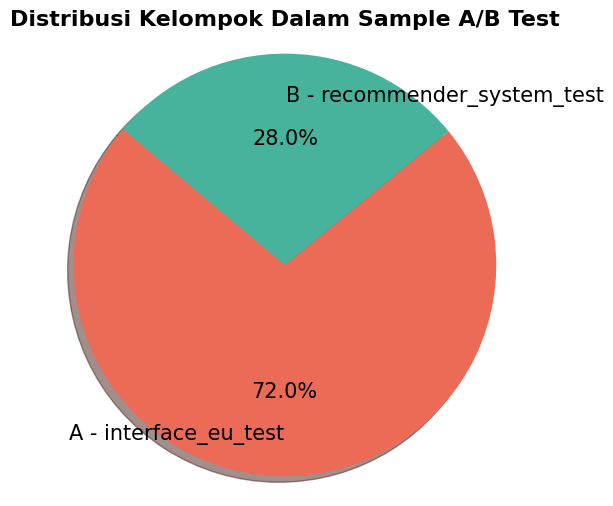

In [69]:
# Mengelompokkan data berdasarkan 'group' dan 'ab_test', kemudian menghitung jumlah 'user_id' di setiap kelompok
grouped_data = merge_dataset2.groupby(['group', 'ab_test']).count()[['user_id']].reset_index()

# Mengambil data dari 'user_id' untuk pie chart
data = grouped_data['user_id']
labels = grouped_data['group'] + ' - ' + grouped_data['ab_test']
colors = ['#EC6B56', '#47B39C']

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, labeldistance=0.8, textprops={'fontsize': 15, 'color': 'black'}, shadow=True)  # Tambahkan shadow=True
plt.title("Distribusi Kelompok Dalam Sample A/B Test", fontsize=16, fontweight='semibold')
plt.axis('equal')

# Menampilkan pie chart
plt.show()


**Temuan 10 :**

Dalam dataset, terlihat bahwa persentase antara kedua kelompok A/B Testing **tidak seimbang**. Kelompok A memiliki **8.961 user** yang terdaftar dalam kelompok **"interface_eu_test"**, sementara kelompok B hanya memiliki **3.481 user** yang terdaftar dalam kelompok **"recommender_system_test"**. Hal ini mengindikasikan **ketidakseimbangan** dalam jumlah peserta antar kedua uji, dengan **kelompok A memiliki jumlah yang lebih besar dibandingkan kelompok B**.

In [70]:
# memuat dataset setelah penyesuaian

user_experiment_fil = merge_dataset2.drop(['first_date', 'region', 'device'], axis=1)
user_experiment_fil

user_id group                  ab_test
0      D1ABA3E2887B6A73     B  recommender_system_test
1      A7A3664BD6242119     B  recommender_system_test
2      DABC14FDDFADD29E     B  recommender_system_test
3      04988C5DF189632E     B  recommender_system_test
4      4FF2998A348C484F     B  recommender_system_test
...                 ...   ...                      ...
13633  1D302F8688B91781     A        interface_eu_test
13634  3DE51B726983B657     A        interface_eu_test
13635  F501F79D332BE86C     A        interface_eu_test
13636  63FBE257B05F2245     A        interface_eu_test
13637  79F9ABFB029CF724     A        interface_eu_test

[12442 rows x 3 columns]

In [71]:
# Identifikasi pengurangan jumlah baris setelah penyesuaian data

print("Terjadi pengurangan baris data sebanyak :", len(user_experiment) - len(user_experiment_fil), "baris data")

Terjadi pengurangan baris data sebanyak : 1196 baris data


# **5. TAHAP 2 : PRAPEMROSESAN DATA**

## **MELAKUKAN JOIN DATASET**

In [72]:
# Melakukan join antara all_new_user & all_event

user_event = pd.merge(all_new_user_fil, all_event_fil, on='user_id', how='inner')
user_event = pd.merge(user_event, user_experiment_fil, on='user_id', how='inner')
user_event

user_id first_date region  device            event_dt  \
0      D72A72121175D8BE 2020-12-07     EU      PC 2020-12-07 21:52:10   
1      D72A72121175D8BE 2020-12-07     EU      PC 2020-12-07 21:52:07   
2      2E1BF1D4C37EA01F 2020-12-07     EU      PC 2020-12-07 09:05:47   
3      2E1BF1D4C37EA01F 2020-12-07     EU      PC 2020-12-10 04:13:53   
4      2E1BF1D4C37EA01F 2020-12-07     EU      PC 2020-12-12 17:54:57   
...                 ...        ...    ...     ...                 ...   
90375  1C7D23927835213F 2020-12-20     EU  iPhone 2020-12-27 03:51:36   
90376  1C7D23927835213F 2020-12-20     EU  iPhone 2020-12-20 14:14:28   
90377  1C7D23927835213F 2020-12-20     EU  iPhone 2020-12-21 04:31:15   
90378  1C7D23927835213F 2020-12-20     EU  iPhone 2020-12-23 15:47:23   
90379  1C7D23927835213F 2020-12-20     EU  iPhone 2020-12-27 03:51:35   

         event_name  details group                  ab_test  
0      product_page      NaN     B  recommender_system_test  
1             login      NaN     B  recommender_system_test  
2      product_cart      NaN     A        interface_eu_test  
3      product_cart      NaN     A        interface_eu_test  
4      product_cart      NaN     A        interface_eu_test  
...             ...      ...   ...                      ...  
90375  product_page      NaN     A        interface_eu_test  
90376         login      NaN     A        interface_eu_test  
90377         login      NaN     A        interface_eu_test  
90378         login      NaN     A        interface_eu_test  
90379         login      NaN     A        interface_eu_test  

[90380 rows x 9 columns]

In [73]:
print("Jumlah Pengguna :", user_event['user_id'].nunique(), "Pengguna")
print("Jumlah Total Aktifitas Oleh Pengguna :", len(user_event), 'Sesi')
print("Periode Registrasi Pengguna Baru :", user_event['first_date'].dt.date.min(), "hingga", user_event['first_date'].dt.date.max())
print("Periode Berakhirnya Eksperimen :", user_event['event_dt'].dt.date.max())

Jumlah Pengguna : 12440 Pengguna
Jumlah Total Aktifitas Oleh Pengguna : 90380 Sesi
Periode Registrasi Pengguna Baru : 2020-12-07 hingga 2020-12-21
Periode Berakhirnya Eksperimen : 2020-12-30


## **IDENTIFIKASI DUPLIKAT PADA DATA**

In [74]:
# Menghitung jumlah duplikat pada data
jumlah_duplikat = user_event.duplicated().sum()

# Menghitung jumlah total baris dalam dataframe
jumlah_total = len(user_event)

# Menghitung persentase duplikat
persentase_duplikat = (jumlah_duplikat / jumlah_total) * 100

print('Teridentifikasi sebanyak', jumlah_duplikat, 'duplikat pada dataset')
print('Persentase duplikat dalam dataset: {:.2f}%'.format(persentase_duplikat))

Teridentifikasi sebanyak 0 duplikat pada dataset
Persentase duplikat dalam dataset: 0.00%


## **MELAKUKAN PENYESUAIAN DATA**

In [75]:
# Menambahkan kolom baru "matched_event" untuk mengidentifikasi event pemasaran yang terjadi selama periode analisa
user_event['event_dt'] = pd.to_datetime(user_event['event_dt'])
kalender_event['start_dt'] = pd.to_datetime(kalender_event['start_dt'])
kalender_event['finish_dt'] = pd.to_datetime(kalender_event['finish_dt'])

# Fungsi untuk mencocokkan event dengan rentang tanggal
def find_event(row):
    event_date = row['event_dt']
    event_region = row['region']
    matching_event = kalender_event[(kalender_event['start_dt'] <= event_date) & (kalender_event['finish_dt'] >= event_date) & (kalender_event['regions'] == event_region)]
    if not matching_event.empty:
        return matching_event['name'].values[0]
    else:
        return None

In [76]:
# Tambahkan kolom 'matched_event' ke dataframe merged_data
user_event['matched_event'] = user_event.apply(find_event, axis=1)

In [77]:
# Tampilkan hasil
user_event.sort_values(by=['user_id', 'event_dt'], ascending=True)

user_id first_date region   device            event_dt  \
69695   859067960182863 2020-12-12     EU  Android 2020-12-12 10:21:30   
69703   859067960182863 2020-12-12     EU  Android 2020-12-12 10:21:30   
69699   859067960182863 2020-12-12     EU  Android 2020-12-12 10:21:31   
69696   859067960182863 2020-12-12     EU  Android 2020-12-13 03:09:05   
69700   859067960182863 2020-12-12     EU  Android 2020-12-13 03:09:05   
...                 ...        ...    ...      ...                 ...   
44894  FFF28D02B1EACBE1 2020-12-16     EU       PC 2020-12-24 00:51:06   
44897  FFF28D02B1EACBE1 2020-12-16     EU       PC 2020-12-24 00:51:06   
82587  FFF58BC33966EB51 2020-12-13     EU  Android 2020-12-13 17:55:19   
82588  FFF58BC33966EB51 2020-12-13     EU  Android 2020-12-15 04:48:35   
82589  FFF58BC33966EB51 2020-12-13     EU  Android 2020-12-17 03:19:16   

         event_name  details group                  ab_test matched_event  
69695      purchase     4.99     A        interface_eu_test          None  
69703         login      NaN     A        interface_eu_test          None  
69699  product_cart      NaN     A        interface_eu_test          None  
69696      purchase     4.99     A        interface_eu_test          None  
69700  product_cart      NaN     A        interface_eu_test          None  
...             ...      ...   ...                      ...           ...  
44894  product_cart      NaN     B  recommender_system_test          None  
44897  product_page      NaN     B  recommender_system_test          None  
82587         login      NaN     A        interface_eu_test          None  
82588         login      NaN     A        interface_eu_test          None  
82589         login      NaN     A        interface_eu_test          None  

[90380 rows x 10 columns]

In [78]:
# Identifikasi event pemasaran selama periode analisa
user_event['matched_event'].unique()

array([None, 'Christmas&New Year Promo'], dtype=object)

In [79]:
# Identifikasi event pemasaran (Christmas&New Year Promo) selama periode analisa
user_event[user_event['matched_event'] == 'Christmas&New Year Promo'].sort_values(by=['user_id', 'event_dt'], ascending=True)

user_id first_date region   device            event_dt  \
5296      9711684244113800 2020-12-07     EU  Android 2020-12-29 03:03:19   
5304      9711684244113800 2020-12-07     EU  Android 2020-12-29 03:03:19   
54189  1796009027406000128 2020-12-17     EU  Android 2020-12-28 09:55:02   
54199  1796009027406000128 2020-12-17     EU  Android 2020-12-28 09:55:02   
54194  1796009027406000128 2020-12-17     EU  Android 2020-12-28 09:55:03   
...                    ...        ...    ...      ...                 ...   
24196     FF5B24BCE4387F86 2020-12-21     EU  Android 2020-12-29 09:31:46   
24199     FF5B24BCE4387F86 2020-12-21     EU  Android 2020-12-29 09:31:46   
77460     FF825C1D791989B5 2020-12-19     EU       PC 2020-12-27 02:48:26   
77464     FF825C1D791989B5 2020-12-19     EU       PC 2020-12-27 02:48:26   
78239     FFEFC0E55C1CCD4F 2020-12-13     EU       PC 2020-12-28 00:25:08   

         event_name  details group                  ab_test  \
5296   product_page      NaN     A        interface_eu_test   
5304          login      NaN     A        interface_eu_test   
54189      purchase     4.99     B  recommender_system_test   
54199         login      NaN     B  recommender_system_test   
54194  product_page      NaN     B  recommender_system_test   
...             ...      ...   ...                      ...   
24196  product_page      NaN     B  recommender_system_test   
24199         login      NaN     B  recommender_system_test   
77460  product_cart      NaN     B  recommender_system_test   
77464         login      NaN     B  recommender_system_test   
78239         login      NaN     A        interface_eu_test   

                  matched_event  
5296   Christmas&New Year Promo  
5304   Christmas&New Year Promo  
54189  Christmas&New Year Promo  
54199  Christmas&New Year Promo  
54194  Christmas&New Year Promo  
...                         ...  
24196  Christmas&New Year Promo  
24199  Christmas&New Year Promo  
77460  Christmas&New Year Promo  
77464  Christmas&New Year Promo  
78239  Christmas&New Year Promo  

[9142 rows x 10 columns]

**Temuan 11 :**

Kami telah mengidentifikasi **permasalahan independensi** dalam data uji kami. Permasalahan ini menunjukkan bahwa sejumlah pembelian oleh pengguna kami mungkin telah dipengaruhi oleh event pemasaran yang memicu transaksi, seperti event **Christmas & New Year Promo**.

Dalam kasus ini, ketika event pemasaran seperti **Christmas & New Year Promo** dilakukan, pengguna mungkin cenderung melakukan transaksi atau pembelian tertentu sebagai respons terhadap penawaran atau insentif yang ditawarkan selama event tersebut. Hal ini dapat menghasilkan kenaikan yang signifikan dalam jumlah transaksi pada periode waktu yang terkait dengan event tersebut.

Penting untuk memahami dampak dari event-event pemasaran ini pada data uji kami, karena pengaruh dari event-event tersebut dapat mengganggu hasil analisis eksperimen yang sedang berlangsung. Oleh karena itu, kami perlu mempertimbangkan bagaimana kita akan mengisolasi dan memahami efek independen dari event pemasaran ini dalam analisis eksperimen kami, agar hasilnya lebih akurat dan relevan untuk evaluasi strategi pemasaran.

# **6. TAHAP 3 : ANALISIS DATA EKSPLORATIF**

In [80]:
data_eda = user_event.copy()
data_eda

user_id first_date region  device            event_dt  \
0      D72A72121175D8BE 2020-12-07     EU      PC 2020-12-07 21:52:10   
1      D72A72121175D8BE 2020-12-07     EU      PC 2020-12-07 21:52:07   
2      2E1BF1D4C37EA01F 2020-12-07     EU      PC 2020-12-07 09:05:47   
3      2E1BF1D4C37EA01F 2020-12-07     EU      PC 2020-12-10 04:13:53   
4      2E1BF1D4C37EA01F 2020-12-07     EU      PC 2020-12-12 17:54:57   
...                 ...        ...    ...     ...                 ...   
90375  1C7D23927835213F 2020-12-20     EU  iPhone 2020-12-27 03:51:36   
90376  1C7D23927835213F 2020-12-20     EU  iPhone 2020-12-20 14:14:28   
90377  1C7D23927835213F 2020-12-20     EU  iPhone 2020-12-21 04:31:15   
90378  1C7D23927835213F 2020-12-20     EU  iPhone 2020-12-23 15:47:23   
90379  1C7D23927835213F 2020-12-20     EU  iPhone 2020-12-27 03:51:35   

         event_name  details group                  ab_test  \
0      product_page      NaN     B  recommender_system_test   
1             login      NaN     B  recommender_system_test   
2      product_cart      NaN     A        interface_eu_test   
3      product_cart      NaN     A        interface_eu_test   
4      product_cart      NaN     A        interface_eu_test   
...             ...      ...   ...                      ...   
90375  product_page      NaN     A        interface_eu_test   
90376         login      NaN     A        interface_eu_test   
90377         login      NaN     A        interface_eu_test   
90378         login      NaN     A        interface_eu_test   
90379         login      NaN     A        interface_eu_test   

                  matched_event  
0                          None  
1                          None  
2                          None  
3                          None  
4                          None  
...                         ...  
90375  Christmas&New Year Promo  
90376                      None  
90377                      None  
90378                      None  
90379  Christmas&New Year Promo  

[90380 rows x 10 columns]

## **IDENTIFIKASI JUMLAH SESI PER PERIODE**

In [81]:
# Identifikasi jumlah sesi per periode
session_data = data_eda.groupby(data_eda['event_dt'].dt.date)['user_id'].count().reset_index()
session_data.columns = ['periode', 'jumlah_sesi']
session_data.head()

periode  jumlah_sesi
0  2020-12-07         2555
1  2020-12-08         2719
2  2020-12-09         2865
3  2020-12-10         2979
4  2020-12-11         2982

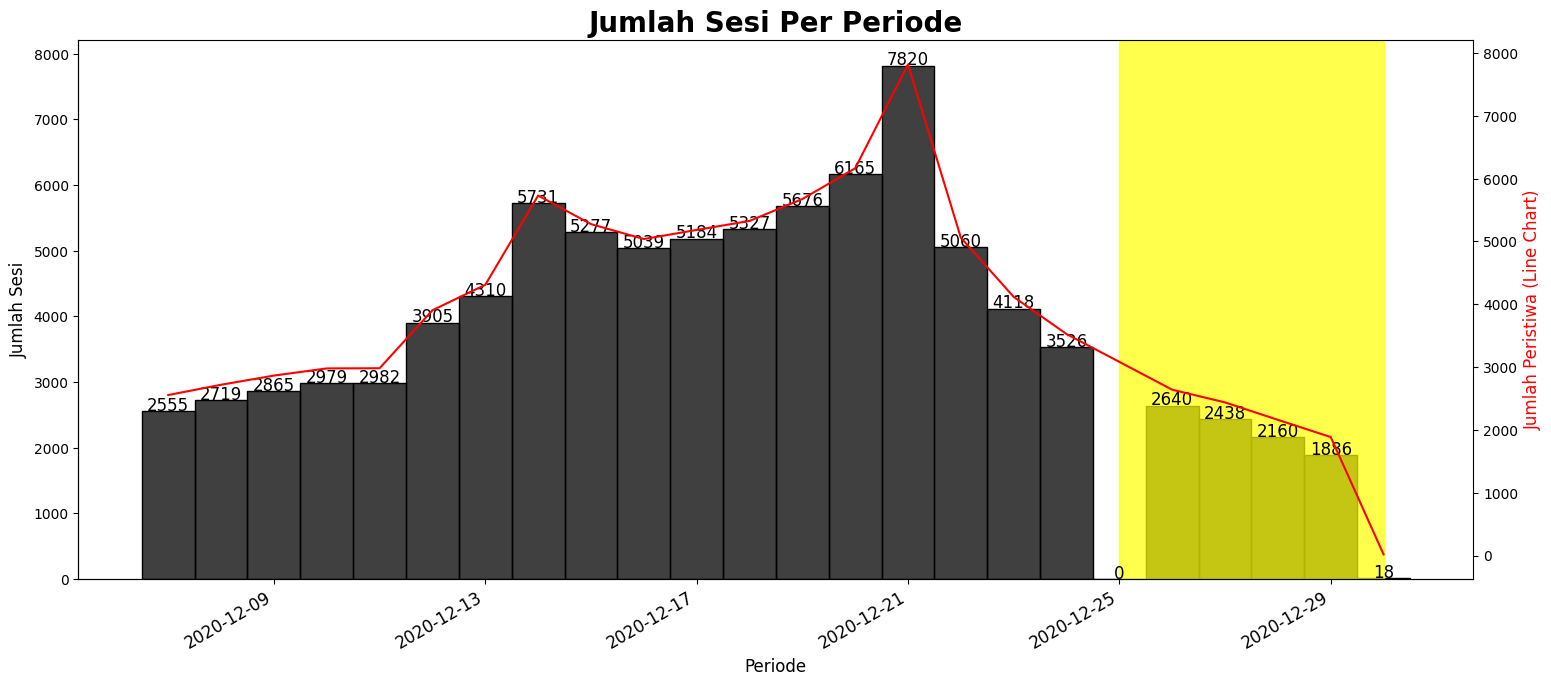

In [82]:
# Mengelompokkan data berdasarkan 'event_dt' dan menghitung jumlah 'event_name'
event_per_date = data_eda.groupby(data_eda['event_dt'].dt.date)['event_name'].count().reset_index()
event_per_date.columns = ['event_dt', 'jumlah_peristiwa']

# Konversi kolom 'event_dt' ke dalam format datetime
event_per_date['event_dt'] = event_per_date['event_dt'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d'))

# Membuat figure dan axes
fig, ax1 = plt.subplots(figsize=(18, 7))

# Bar chart pada axes pertama (ax1)
hist = sns.histplot(x=data_eda['event_dt'].dt.date, color='black', ax=ax1)
plt.xticks(rotation=30, fontsize=12, ha='right')

sns.despine()
ax1.set_xlabel('Periode', size=12)
ax1.set_ylabel('Jumlah Sesi', size=12)
ax1.set_title('Jumlah Sesi Per Periode', fontsize=20, fontweight='bold')
for p in hist.patches:
    hist.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha="center", va="center",
                  size=12,
                  xytext=(0, 4),
                  textcoords='offset points')

# Menambahkan area berwarna kuning transparan
ax1.axvspan('2020-12-25', '2020-12-30', alpha=0.7, color='yellow')

# Axes kedua (ax2) untuk line chart
ax2 = ax1.twinx()  # Membuat axes dengan skala yang sama dengan ax1

# Line chart pada axes kedua (ax2)
line_chart = sns.lineplot(x='event_dt', y='jumlah_peristiwa', data=event_per_date, color='red', ax=ax2)

# Mengatur label sumbu y untuk axes kedua
ax2.set_ylabel('Jumlah Peristiwa (Line Chart)', color='red', size=12)

# Menampilkan plot
plt.show()

**Kesimpulan :**

Area berwarna kuning menunjukkan rentang periode selama pelaksanaan **Promo Natal & Tahun Baru**. Awalnya, kami mengasumsikan bahwa event pemasaran ini dapat meningkatkan jumlah transaksi dari pengguna, sehingga berpotensi menimbulkan isu independensi data. Namun, setelah analisis lebih lanjut, kami menemukan bahwa event ini sebenarnya tidak berdampak signifikan pada aktivitas pengguna di platform. Bahkan, selama periode **25 Desember 2020**, tidak ada transaksi yang tercatat (total penjualan = 0). Dengan pertimbangan tersebut, kami memutuskan untuk tetap mempertahankan data selama periode tersebut tanpa menghapusnya.

In [83]:
# # mengambil baris dalam dataset di mana kolom 'matched_event' tidak sama dengan 'Christmas&New Year Promo'
# user_event = user_event[user_event['matched_event'] != 'Christmas&New Year Promo']

# # Menampilkan dataset yang telah difilter
# user_event

## **IDENTIFIKASI JUMLAH SESI PER FUNNEL**

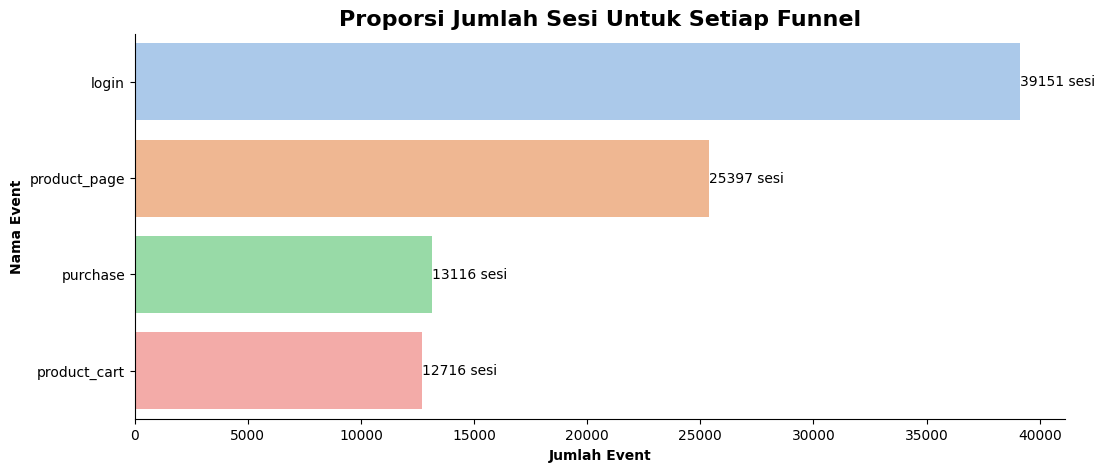

In [84]:
# Menghitung jumlah event per event_name
event_prop = data_eda.groupby('event_name')['user_id'].count().sort_values(ascending=False).reset_index()

# Membuat palet warna yang berbeda untuk setiap bar chart
colors = sns.color_palette("pastel", len(event_prop))

# Membuat plot bar dengan warna yang berbeda
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='user_id', y='event_name', data=event_prop, palette=colors)

# Menambahkan anotasi untuk setiap bar chart dengan notasi "sesi"
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f} sesi', ha='left', va='center')

plt.xlabel('Jumlah Event', fontweight='bold')
plt.ylabel('Nama Event', fontweight='bold')
ax.set_title('Proporsi Jumlah Sesi Untuk Setiap Funnel', fontsize=16, fontweight='bold')
sns.despine()
plt.grid(False, axis='x')

plt.show()

   * **Login (39.151 sesi)** : Jumlah login mencapai 39.151 sesi. Ini menunjukkan bahwa banyak sesi dimana pengguna masuk ke platform atau aplikasi, yang menjadi tahap awal dalam penggunaan produk atau layanan.

   * **Product Page (25.397 sesi)** : Terdapat 25.397 sesi dimana pengguna mengunjungi halaman produk. Hal ini menunjukkan minat pengguna dalam mengeksplorasi produk atau layanan yang tersedia. Pengguna mungkin sedang mencari informasi lebih lanjut tentang produk atau sedang mempertimbangkan untuk melakukan pembelian.

   * **Purchase (13.116 sesi)** : Jumlah pembelian mencapai 13.116 sesi. Ini menunjukkan adanya sejumlah besar sesi dimana pengguna telah berhasil melakukan transaksi atau pembelian produk atau layanan. Ini adalah konversi dari kunjungan ke halaman produk menjadi tindakan pembelian.

   * **Product Cart (12.716 sesi)** : Ada 12.716 sesi dimana pengguna menambahkan produk ke keranjang belanja. Ini menunjukkan minat yang kuat dalam produk, tetapi belum tentu semua produk dalam keranjang belanja tersebut akan dibeli. Hal ini bisa menjadi area di mana perusahaan dapat melakukan upaya tambahan untuk mendorong konversi dari penempatan produk di keranjang belanja menjadi pembelian.
   
**Kesimpulan :**

Lebih rendahnya jumlah sesi pada tahap **"product_cart"** dibandingkan dengan tahap **"purchase"** dalam customer journey di suatu aplikasi belanja dapat dijelaskan oleh beberapa alasan sebagai berikut :

   1. Pengguna mungkin tidak selalu menambahkan produk ke keranjang belanja setiap kali mereka mengunjungi aplikasi. Mereka mungkin sudah memiliki beberapa produk yang mereka pertimbangkan dari kunjungan sebelumnya, sehingga tidak perlu menambahkan produk ke keranjang lagi setiap kali mereka masuk.
   2. Pengguna yang mencapai tahap "product_cart" mungkin telah mengevaluasi produk-produk yang mereka inginkan dan memutuskan untuk membeli produk tersebut sesaat setelah mereka masuk ke platform. Dalam hal ini, mereka akan beralih langsung ke tahap "purchase" tanpa harus memasukkannya terlebih dahulu ke keranjang belanja. Ini menunjukkan bahwa mereka memiliki niat pembelian yang kuat.
   3. Strategi pemasaran tertentu mungkin lebih menekankan untuk mendorong pengguna agar segera melakukan pembelian alih-alih menambahkan produk ke keranjang belanja. Ini tercermin dalam upaya perusahaan saat ini yang fokus pada peningkatan sistem rekomendasi kepada pengguna, dengan harapan dapat meningkatkan tingkat konversi mereka menjadi pembeli yang aktif.

In [85]:
# Jumlah sesi yang dibuat oleh pengguna per event name
jumlah_sesi_per_event = data_eda.pivot_table(index='event_name',values='user_id',aggfunc='count').sort_values('user_id')
jumlah_sesi_per_event = jumlah_sesi_per_event.sort_values('user_id', ascending=False).reset_index()
jumlah_sesi_per_event['percentage'] = round((jumlah_sesi_per_event['user_id'] / jumlah_sesi_per_event.loc[0, 'user_id']) * 100,2)

# menambahkan kolom percentage_change kedataset
jumlah_sesi_per_event['percentage_change'] = jumlah_sesi_per_event['user_id'].pct_change() * 100

# Mengganti nama kolom 'user_id' menjadi 'jumlah_sesi'
jumlah_sesi_per_event.rename(columns={'user_id': 'jumlah_sesi'}, inplace=True)
jumlah_sesi_per_event

event_name  jumlah_sesi  percentage  percentage_change
0         login        39151      100.00                NaN
1  product_page        25397       64.87         -35.130648
2      purchase        13116       33.50         -48.356105
3  product_cart        12716       32.48          -3.049710

In [86]:
# membuat funnel chart
colors = ["#FFD700", "#FFEC8B", "#FFFFE0", "#F0E68C"]

# Membuat funnel chart dengan gradasi warna
fig = go.Figure(go.Funnel(
    y=jumlah_sesi_per_event['event_name'],
    x=jumlah_sesi_per_event['jumlah_sesi'],
    marker={"color": colors}
))

# Menambahkan judul dan label sumbu
fig.update_layout(
    title="Jumlah Sesi Per Funnel",
    yaxis_title="Event Name",
    xaxis_title="Number of Event",
    plot_bgcolor='rgba(0,0,0,0)'
)

# Menampilkan funnel chart
fig.show()

**Kesimpulan :**

Dari jumlah total **39.151 sesi** yang dimulai dengan tindakan **login** di aplikasi belanja perusahaan, sekitar **65% dari sesi tersebut melanjutkan ke tahap berikutnya, yaitu mengunjungi halaman produk (product page)**. Dari pengguna yang mengunjungi halaman produk tersebut, sekitar **51.6% sesi melanjutkan proses ke tahap pembayaran**. Di sisi lain, sekitar **50% dari sesi product page memutuskan untuk hanya memasukkan produk ke dalam keranjang belanja (product cart)**. Secara lebih spesifik, dari keseluruhan sesi yang dimulai dengan tindakan login, sekitar **35% dari sesi tersebut akhirnya mencapai tahap pembelian**.

Adanya perbandingan antara persentase pengguna yang melakukan pembayaran langsung setelah melihat produk (product page) dengan yang terlebih dahulu memasukkan produk ke dalam keranjang (product cart) menunjukkan adanya variasi dalam perilaku pengguna.

**Selanjutnya kami akan membandingkan funnel event antara 2 kelompok pengguna untuk mengidentifikasi ada atau tidaknya kecenderungan yang berbeda**

In [87]:
# Jumlah sesi yang dibuat oleh pengguna per event name (kelompok A)
jumlah_sesi_per_event_A = data_eda[data_eda['group'] == "A"]
jumlah_sesi_per_event_A = jumlah_sesi_per_event_A.pivot_table(index='event_name',values='user_id',aggfunc='count').sort_values('user_id')
jumlah_sesi_per_event_A = jumlah_sesi_per_event_A.sort_values('user_id', ascending=False).reset_index()
jumlah_sesi_per_event_A['percentage'] = round((jumlah_sesi_per_event_A['user_id'] / jumlah_sesi_per_event_A.loc[0, 'user_id']) * 100,2)

# menambahkan kolom percentage_change kedataset
jumlah_sesi_per_event_A['percentage_change'] = jumlah_sesi_per_event_A['user_id'].pct_change() * 100

# Mengganti nama kolom 'user_id' menjadi 'jumlah_sesi'
jumlah_sesi_per_event_A.rename(columns={'user_id': 'jumlah_sesi'}, inplace=True)
jumlah_sesi_per_event_A

event_name  jumlah_sesi  percentage  percentage_change
0         login        28890      100.00                NaN
1  product_page        19057       65.96         -34.035999
2      purchase        10038       34.75         -47.326442
3  product_cart         9722       33.65          -3.148037

In [88]:
# Jumlah sesi yang dibuat oleh pengguna per event name (kelompok A)
jumlah_sesi_per_event_B = data_eda[data_eda['group'] == "B"]
jumlah_sesi_per_event_B = jumlah_sesi_per_event_B.pivot_table(index='event_name',values='user_id',aggfunc='count').sort_values('user_id')
jumlah_sesi_per_event_B = jumlah_sesi_per_event_B.sort_values('user_id', ascending=False).reset_index()
jumlah_sesi_per_event_B['percentage'] = round((jumlah_sesi_per_event_B['user_id'] / jumlah_sesi_per_event_B.loc[0, 'user_id']) * 100,2)

# menambahkan kolom percentage_change kedataset
jumlah_sesi_per_event_B['percentage_change'] = jumlah_sesi_per_event_B['user_id'].pct_change() * 100

# Mengganti nama kolom 'user_id' menjadi 'jumlah_sesi'
jumlah_sesi_per_event_B.rename(columns={'user_id': 'jumlah_sesi'}, inplace=True)
jumlah_sesi_per_event_B

event_name  jumlah_sesi  percentage  percentage_change
0         login        10261      100.00                NaN
1  product_page         6340       61.79         -38.212650
2      purchase         3078       30.00         -51.451104
3  product_cart         2994       29.18          -2.729045

In [89]:
# Membuat dataframe yang menggabungkan data sesi untuk kelompok A dan B
funnel_data = pd.concat([jumlah_sesi_per_event_A, jumlah_sesi_per_event_B], keys=['A', 'B'], names=['Group']).reset_index(level=0)

# Membuat funnel chart
fig = px.funnel(funnel_data,
                x='jumlah_sesi',
                y='event_name',
                color='Group',  # Warna berbeda untuk setiap kelompok
                title='Funnel Chart Kelompok A (Interface EU Test) dan B (Recommender System Test)',
                labels={'user_id': 'Jumlah Event', 'event_name': 'Event Name', 'Group': 'Kelompok'},
                height=600,  # Ubah ukuran sesuai kebutuhan
                width=800)   # Ubah ukuran sesuai kebutuhan

# Menambahkan anotasi berupa persentase
fig.update_traces(textinfo='percent initial+percent previous')

# Menampilkan funnel chart
fig.show()

**Kesimpulan :**

   * Data funnel untuk kelompok B (Recommender System Test) menunjukkan sebagian besar sesi yang dimulai semenjak login, tetapi kemudian **hanya 62% dari mereka yang melanjutkan ke halaman produk**, dan **hanya 30% yang benar-benar melakukan pembelian**.

   * Sementara itu untuk kelompok A (Interface EU Test), persentase konversi dari login ke halaman produk adalah 66%, **lebih tinggi dibandingkan dengan kelompok B**. Meskipun demikian, hanya **35% yang benar-benar melakukan pembelian**, dan **34% yang memasukkan produk ke dalam keranjang belanja**.
   
   * Meskipun terjadi penurunan konversi dari satu tahap ke tahap berikutnya, **konversi dari login ke pembelian untuk kelompok A masih lebih tinggi dibandingkan dengan kelompok B**.

## **IDENTIFIKASI JUMLAH USER PER FUNNEL**

In [90]:
# Menghitung jumlah user per event_name
user_prop = data_eda.groupby('event_name')['user_id'].nunique().sort_values(ascending=False).reset_index()
user_prop

event_name  user_id
0         login    12440
1  product_page     8123
2      purchase     4171
3  product_cart     4021

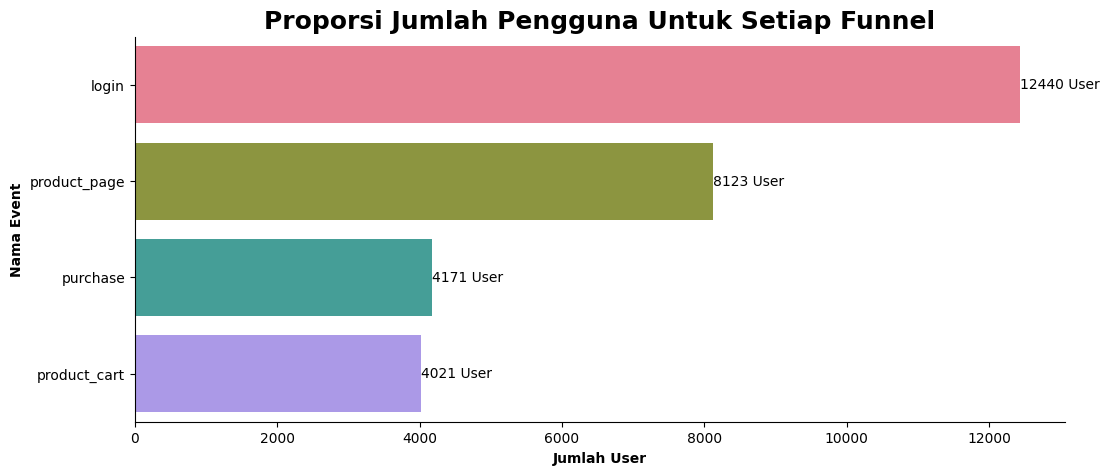

In [91]:
# Menghitung jumlah user per event_name
user_prop = data_eda.groupby('event_name')['user_id'].nunique().sort_values(ascending=False).reset_index()

# Membuat palet warna yang berbeda untuk setiap bar chart
colors = sns.color_palette("husl", len(user_prop))

# Membuat plot bar dengan warna yang berbeda
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='user_id', y='event_name', data=user_prop, palette=colors)

# Menambahkan anotasi untuk setiap bar chart
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f} User', ha='left', va='center')

plt.xlabel('Jumlah User', fontweight='bold')
plt.ylabel('Nama Event', fontweight='bold')
ax.set_title('Proporsi Jumlah Pengguna Untuk Setiap Funnel', fontsize=18, fontweight='semibold')
sns.despine()
plt.grid(False, axis='x')

plt.show()

   * **Login (12.440 user) :** Jumlah user yang melakukan login di aplikasi atau platform adalah sebanyak 12.440 user
   * **Product Page (8.123 user) :** Jumlah pengguna yang mengunjungi halaman produk sebanyak 8.123 user. Ini mencerminkan ketertarikan pengguna dalam melihat produk yang ditawarkan di aplikasi belanja perusahaan
   * **Purchase (4.171 user) :** Jumlah user yang pada akhirnya memutuskan untuk melakukan pembelian produk adalah sebanyak 4.171 user
   * **Product Cart (4.021 user) :** Jumlah user yang memasukkan produk ke dalam keranjang belanja alih-alih melakukan pembelian adalah sebanyak 4.021 user. Ini menunjukkan bahwa terdapat sejumlah pengguna memilih untuk mengumpulkan produk sebelum melakukan pembelian
   
**Kesimpulan :**

Jumlah user pada tahap "Product Cart" yang lebih rendah dibandingkan dengan tahap "Purchase" merupakan hal lumrah yang terjadi apabila mempertimbangkan alasan berikut :
   1. Pengguna mungkin telah meninjau produk di halaman produk (Product Page) dan memutuskan untuk langsung melakukan pembelian tanpa perlu menyimpan produk ke dalam keranjang. Ini dapat terjadi jika produk yang mereka amati memiliki harga yang sangat menarik atau mereka memang sedang sangat membutuhkan produk tersebut sehingga membuat mereka langsung melakukan pembelian
   2. Pengguna yang menggunakan keranjang produk mungkin masih dalam tahap pertimbangan atau membandingkan beberapa produk sebelum membuat keputusan akhir. Sebagian dari mereka mungkin tidak melanjutkan pembelian karena menemukan produk yang lebih baik di tempat lain atau memiliki pertimbangan yang lebih mendalam tentang produk yang ingin mereka beli
   
**Selanjutnya kami akan membandingkan funnel event antara 2 kelompok pengguna untuk mengidentifikasi ada atau tidaknya kecenderungan yang berbeda**

In [92]:
# Jumlah pengguna per event name
jumlah_user_per_event = data_eda.pivot_table(index='event_name',values='user_id',aggfunc='nunique').sort_values('user_id')
jumlah_user_per_event = jumlah_user_per_event.sort_values('user_id', ascending=False).reset_index()
jumlah_user_per_event['percentage'] = round((jumlah_user_per_event['user_id'] / jumlah_user_per_event.loc[0, 'user_id']) * 100,2)

# menambahkan kolom percentage_change kedataset
jumlah_user_per_event['percentage_change'] = jumlah_user_per_event['user_id'].pct_change() * 100

# Mengganti nama kolom 'user_id' menjadi 'jumlah_pengguna'
jumlah_user_per_event.rename(columns={'user_id': 'jumlah_pengguna'}, inplace=True)
jumlah_user_per_event

event_name  jumlah_pengguna  percentage  percentage_change
0         login            12440      100.00                NaN
1  product_page             8123       65.30         -34.702572
2      purchase             4171       33.53         -48.651976
3  product_cart             4021       32.32          -3.596260

In [93]:
# membuat funnel chart
colors = ["#0000FF", "#0000E5", "#0000CC", "#0000B2"]

# Membuat funnel chart dengan warna biru
fig = go.Figure(go.Funnel(
    y=jumlah_user_per_event['event_name'],
    x=jumlah_user_per_event['jumlah_pengguna'],
    marker={"color": colors}
))

# Menambahkan judul dan label sumbu
fig.update_layout(
    title="Jumlah Pengguna Per Event",
    yaxis_title="Event Name",
    xaxis_title="Jumlah Pengguna",
    plot_bgcolor='rgba(0,0,0,0)'
)

# Menampilkan funnel chart
fig.show()


**Kesimpulan :**

Dari total **12.440 user** yang melakukan login ke aplikasi belanja online, sekitar **65.3%** dari mereka memilih untuk melanjutkan dan menjelajahi halaman produk, sementara sekitar **35%** lainnya memilih untuk meninggalkan aplikasi. Dari pengguna yang mengunjungi halaman produk, sekitar **51.4%** dari mereka memutuskan untuk melakukan pembelian, sementara sekitar **41.9%** memilih untuk memasukkan produk ke dalam keranjang belanja mereka. Kumulatifnya, jumlah pengguna yang akhirnya melakukan pembelian setelah melakukan login cukup signifikan, mencapai **33.5%**. Ini mengindikasikan bahwa sebagian besar pengguna yang melakukan login cenderung tertarik untuk menjelajahi produk dan melakukan pembelian langsung, tanpa perlu menyimpan produk ke dalam keranjang belanja.

In [94]:
# Jumlah user per event name (kelompok A)
jumlah_user_per_event_A = data_eda[data_eda['group'] == "A"]
jumlah_user_per_event_A = jumlah_user_per_event_A.pivot_table(index='event_name',values='user_id',aggfunc='nunique').sort_values('user_id')
jumlah_user_per_event_A = jumlah_user_per_event_A.sort_values('user_id', ascending=False).reset_index()
jumlah_user_per_event_A['percentage'] = round((jumlah_user_per_event_A['user_id'] / jumlah_user_per_event_A.loc[0, 'user_id']) * 100,2)

# menambahkan kolom percentage_change kedataset
jumlah_user_per_event_A['percentage_change'] = jumlah_user_per_event_A['user_id'].pct_change() * 100

# Mengganti nama kolom 'user_id' menjadi 'jumlah_pengguna'
jumlah_user_per_event_A.rename(columns={'user_id': 'jumlah_pengguna'}, inplace=True)
jumlah_user_per_event_A

event_name  jumlah_pengguna  percentage  percentage_change
0         login             8960      100.00                NaN
1  product_page             5945       66.35         -33.649554
2      purchase             3090       34.49         -48.023549
3  product_cart             2995       33.43          -3.074434

In [95]:
# Jumlah user per event name (kelompok B)
jumlah_user_per_event_B = data_eda[data_eda['group'] == "B"]
jumlah_user_per_event_B = jumlah_user_per_event_B.pivot_table(index='event_name',values='user_id',aggfunc='nunique').sort_values('user_id')
jumlah_user_per_event_B = jumlah_user_per_event_B.sort_values('user_id', ascending=False).reset_index()
jumlah_user_per_event_B['percentage'] = round((jumlah_user_per_event_B['user_id'] / jumlah_user_per_event_B.loc[0, 'user_id']) * 100,2)

# menambahkan kolom percentage_change kedataset
jumlah_user_per_event_B['percentage_change'] = jumlah_user_per_event_B['user_id'].pct_change() * 100

# Mengganti nama kolom 'user_id' menjadi 'jumlah_pengguna'
jumlah_user_per_event_B.rename(columns={'user_id': 'jumlah_pengguna'}, inplace=True)
jumlah_user_per_event_B

event_name  jumlah_pengguna  percentage  percentage_change
0         login             3480      100.00                NaN
1  product_page             2178       62.59         -37.413793
2      purchase             1081       31.06         -50.367309
3  product_cart             1026       29.48          -5.087882

In [96]:
# Membuat dataframe yang menggabungkan data sesi untuk kelompok A dan B
funnel_data = pd.concat([jumlah_user_per_event_A, jumlah_user_per_event_B], keys=['A', 'B'], names=['Group']).reset_index(level=0)

# Membuat funnel chart
fig = px.funnel(funnel_data,
                x='jumlah_pengguna',
                y='event_name',
                color='Group',
                title='Funnel Chart Kelompok A (Interface EU Test) dan B (Recommender System Test)',
                labels={'user_id': 'Jumlah Event', 'event_name': 'Event Name', 'Group': 'Kelompok'},
                height=600,  # Ubah ukuran sesuai kebutuhan
                width=800)   # Ubah ukuran sesuai kebutuhan

# Menambahkan anotasi berupa persentase
fig.update_traces(textinfo='percent initial+percent previous')

# Menampilkan funnel chart
fig.show()

**Kesimpulan :**

   * Untuk kelompok A, dari sekitar **8.960 pengguna** yang melakukan login, hanya sekitar **66%** yang melanjutkan ke halaman produk (product_page). Kemudian, hanya sekitar **34%** dari total seluruh pengguna yang login tersebut yang benar-benar melakukan pembelian (purchase). Sementara **33%** dari pengguna yang login memutuskan untuk hanya memasukkan produk ke dalam keranjang belanja (product_cart)

   * Sementara itu, pada kelompok B, dari **3.480 pelanggan** yang melakukan login, persentase pelanggan yang melanjutkan ke halaman produk (product_page) **lebih rendah dibandingkan dengan kelompok A**, yaitu hanya sekitar **63%**. Kemudian, hanya sekitar **31%** dari seluruh total pengguna yang login tersebut yang kemudian benar-benar melakukan pembelian (purchase). Disisi lain, sekitar **29%** dari pengguna yang login lebih memilih untuk hanya memasukkan produk ke dalam keranjang belanja.
   
   * Perbandingan antara kedua kelompok menunjukkan bahwa **kelompok B** memiliki persentase yang lebih rendah dalam hal konversi pengguna pada funnel event dibandingkan dengan **kelompok A**

# **7. TAHAP 4 : ANALISIS EKSPERIMENTAL**

In [97]:
ab_test_data = data_eda.copy()

In [98]:
# Menambahkan kolom baru yang merupakan transformasi kolom 'event_dt' menjadi format YY-mm-dd
ab_test_data['event_date'] = ab_test_data['event_dt'].dt.strftime('%y-%m-%d')
ab_test_data

user_id first_date region  device            event_dt  \
0      D72A72121175D8BE 2020-12-07     EU      PC 2020-12-07 21:52:10   
1      D72A72121175D8BE 2020-12-07     EU      PC 2020-12-07 21:52:07   
2      2E1BF1D4C37EA01F 2020-12-07     EU      PC 2020-12-07 09:05:47   
3      2E1BF1D4C37EA01F 2020-12-07     EU      PC 2020-12-10 04:13:53   
4      2E1BF1D4C37EA01F 2020-12-07     EU      PC 2020-12-12 17:54:57   
...                 ...        ...    ...     ...                 ...   
90375  1C7D23927835213F 2020-12-20     EU  iPhone 2020-12-27 03:51:36   
90376  1C7D23927835213F 2020-12-20     EU  iPhone 2020-12-20 14:14:28   
90377  1C7D23927835213F 2020-12-20     EU  iPhone 2020-12-21 04:31:15   
90378  1C7D23927835213F 2020-12-20     EU  iPhone 2020-12-23 15:47:23   
90379  1C7D23927835213F 2020-12-20     EU  iPhone 2020-12-27 03:51:35   

         event_name  details group                  ab_test  \
0      product_page      NaN     B  recommender_system_test   
1             login      NaN     B  recommender_system_test   
2      product_cart      NaN     A        interface_eu_test   
3      product_cart      NaN     A        interface_eu_test   
4      product_cart      NaN     A        interface_eu_test   
...             ...      ...   ...                      ...   
90375  product_page      NaN     A        interface_eu_test   
90376         login      NaN     A        interface_eu_test   
90377         login      NaN     A        interface_eu_test   
90378         login      NaN     A        interface_eu_test   
90379         login      NaN     A        interface_eu_test   

                  matched_event event_date  
0                          None   20-12-07  
1                          None   20-12-07  
2                          None   20-12-07  
3                          None   20-12-10  
4                          None   20-12-12  
...                         ...        ...  
90375  Christmas&New Year Promo   20-12-27  
90376                      None   20-12-20  
90377                      None   20-12-21  
90378                      None   20-12-23  
90379  Christmas&New Year Promo   20-12-27  

[90380 rows x 11 columns]

In [99]:
# membuat dataframe "df_ab_test"
df_ab_test = ab_test_data[['event_date','ab_test']].drop_duplicates()
df_ab_test.sort_values('event_date', ascending=True)

# menghitung total jumlah sesi, total jumlah pengguna, dan total penjualan per periode dan per kelompok eksperimen
event_agg = (
    df_ab_test
    .apply(lambda x: ab_test_data[np.logical_and(ab_test_data['event_date'] <= x['event_date'], ab_test_data['ab_test'] == x['ab_test'])]
    .agg({'event_date' : 'max',
          'ab_test'    : 'max',
          'event_name' : 'count',
          'user_id'    : 'nunique',
          'details'    : 'sum'}),
           axis=1)
    .sort_values(by=['event_date','ab_test'])
)

# mengubah nama kolom
event_agg = event_agg.rename(columns={'ab_test'    : 'experiment_group',
                                      'event_name' : 'total_sesi',
                                      'user_id'    : 'total_pengguna',
                                      'details'    : 'total_penjualan'})
event_agg

event_date         experiment_group  total_sesi  total_pengguna  \
2      20-12-07        interface_eu_test        1882             830   
0      20-12-07  recommender_system_test         673             310   
12     20-12-08        interface_eu_test        4050            1365   
43     20-12-08  recommender_system_test        1224             446   
32     20-12-09        interface_eu_test        6206            1723   
63     20-12-09  recommender_system_test        1933             611   
3      20-12-10        interface_eu_test        8605            2187   
44     20-12-10  recommender_system_test        2513             704   
86     20-12-11        interface_eu_test       11070            2579   
240    20-12-11  recommender_system_test        3030             811   
4      20-12-12        interface_eu_test       14430            3273   
80     20-12-12  recommender_system_test        3575             923   
161    20-12-13        interface_eu_test       18268            4011   
366    20-12-13  recommender_system_test        4047             991   
146    20-12-14        interface_eu_test       22736            4899   
241    20-12-14  recommender_system_test        5310            1425   
72     20-12-15        interface_eu_test       26761            5385   
413    20-12-15  recommender_system_test        6562            1659   
56     20-12-16        interface_eu_test       30424            5709   
45     20-12-16  recommender_system_test        7938            1916   
117    20-12-17        interface_eu_test       34127            6200   
242    20-12-17  recommender_system_test        9419            2154   
108    20-12-18        interface_eu_test       37951            6730   
46     20-12-18  recommender_system_test       10922            2412   
29     20-12-19        interface_eu_test       41909            7268   
856    20-12-19  recommender_system_test       12640            2681   
134    20-12-20        interface_eu_test       46331            7957   
367    20-12-20  recommender_system_test       14383            2999   
550    20-12-21        interface_eu_test       51847            8958   
1819   20-12-21  recommender_system_test       16687            3480   
14     20-12-22        interface_eu_test       55486            8958   
402    20-12-22  recommender_system_test       18108            3480   
537    20-12-23        interface_eu_test       58456            8959   
1138   20-12-23  recommender_system_test       19256            3480   
15     20-12-24        interface_eu_test       60983            8960   
1021   20-12-24  recommender_system_test       20255            3480   
33     20-12-26        interface_eu_test       62930            8960   
1910   20-12-26  recommender_system_test       20948            3480   
526    20-12-27        interface_eu_test       64707            8960   
652    20-12-27  recommender_system_test       21609            3480   
381    20-12-28        interface_eu_test       66293            8960   
1667   20-12-28  recommender_system_test       22183            3480   
551    20-12-29        interface_eu_test       67693            8960   
399    20-12-29  recommender_system_test       22669            3480   
273    20-12-30        interface_eu_test       67707            8960   
47     20-12-30  recommender_system_test       22673            3480   

      total_penjualan  
2             9567.20  
0             1803.99  
12           16933.96  
43            3043.33  
32           24880.79  
63            4217.47  
3            32207.15  
44            5666.79  
86           39938.53  
240           6851.23  
4            54958.68  
80            8055.60  
161          68182.96  
366           9770.02  
146          82551.17  
241          13813.37  
72           95605.45  
413          18561.68  
56          109309.83  
45           23969.76  
117         123919.44  
242          27737.71  
108         136593.98  
46           31365.77  
29          148773.3

In [100]:
# membuat pivot table total jumlah sesi berdasarkan periode harian dan group eksperimen

pivot_user_event = (pd.pivot_table(ab_test_data,
                            values='user_id',
                            index=['event_date', 'ab_test'],
                            columns=['event_name'],
                            aggfunc='count')
               .reset_index()
               .rename_axis('', axis=1)
              )
# Mengurutkan kolom tabel pivot
column_order = ['event_date', 'ab_test', 'login', 'product_page', 'product_cart', 'purchase']
pivot_user_event = pivot_user_event[column_order]

# mengisi nilai yang nan menjadi 0
pivot_user_event = pivot_user_event.fillna(0)

# Mengubah nilai-nilai kolom menjadi integer
pivot_user_event['login'] = pivot_user_event['login'].astype(int)
pivot_user_event['product_page'] = pivot_user_event['product_page'].astype(int)
pivot_user_event['product_cart'] = pivot_user_event['product_cart'].astype(int)
pivot_user_event['purchase'] = pivot_user_event['purchase'].astype(int)

pivot_user_event

event_date                  ab_test  login  product_page  product_cart  \
0    20-12-07        interface_eu_test    817           535           250   
1    20-12-07  recommender_system_test    303           193            76   
2    20-12-08        interface_eu_test    926           623           295   
3    20-12-08  recommender_system_test    259           159            67   
4    20-12-09        interface_eu_test    915           603           321   
5    20-12-09  recommender_system_test    332           202            89   
6    20-12-10        interface_eu_test    998           688           349   
7    20-12-10  recommender_system_test    280           155            77   
8    20-12-11        interface_eu_test   1041           712           350   
9    20-12-11  recommender_system_test    260           141            60   
10   20-12-12        interface_eu_test   1419           942           514   
11   20-12-12  recommender_system_test    270           144            68   
12   20-12-13        interface_eu_test   1625          1081           560   
13   20-12-13  recommender_system_test    235           129            50   
14   20-12-14        interface_eu_test   1921          1242           626   
15   20-12-14  recommender_system_test    581           344           173   
16   20-12-15        interface_eu_test   1736          1143           574   
17   20-12-15  recommender_system_test    561           338           184   
18   20-12-16        interface_eu_test   1559          1021           521   
19   20-12-16  recommender_system_test    607           381           196   
20   20-12-17        interface_eu_test   1596          1052           516   
21   20-12-17  recommender_system_test    645           406           225   
22   20-12-18        interface_eu_test   1665          1063           550   
23   20-12-18  recommender_system_test    670           433           206   
24   20-12-19        interface_eu_test   1685          1121           584   
25   20-12-19  recommender_system_test    756           479           241   
26   20-12-20        interface_eu_test   1892          1227           631   
27   20-12-20  recommender_system_test    782           485           228   
28   20-12-21        interface_eu_test   2337          1564           801   
29   20-12-21  recommender_system_test   1027           651           292   
30   20-12-22        interface_eu_test   1556          1032           503   
31   20-12-22  recommender_system_test    650           406           174   
32   20-12-23        interface_eu_test   1265           818           421   
33   20-12-23  recommender_system_test    521           322           146   
34   20-12-24        interface_eu_test   1082           715           367   
35   20-12-24  recommender_system_test    434           285           139   
36   20-12-26        interface_eu_test    832           542           280   
37   20-12-26  recommender_system_test    304           201            83   
38   20-12-27        interface_eu_test    748           498           272   
39   20-12-27  recommender_system_test    294           181            85   
40   20-12-28        interface_eu_test    678           447           231   
41   20-12-28  recommender_system_test    259           160            76   
42   20-12-29        interface_eu_test    592           385           203   
43   20-12-29  recommender_system_test    229           144            58   
44   20-12-30        interface_eu_test      5             3             3   
45   20-12-30  recommender_system_test      2             1             1   

    purchase  
0        280  
1        101  
2        324  
3         66  
4        317  
5         86  
6        364  
7         68  
8        362  
9         56  
10       485  
11        63  
12       572  
13        58  
14       679  
15       165  
16       572  
17       169  
18       562  
19       192  
20       539  
21       205  
22       546  
23       194  
24      

In [107]:
# Konversi kolom event menjadi tipe data numerik
event_cols = ['login', 'product_page', 'product_cart', 'purchase']
pivot_user_event[event_cols] = pivot_user_event[event_cols].apply(pd.to_numeric, errors='coerce')

# Menghitung jumlah kumulatif untuk setiap grup
cumsum_user_event = pivot_user_event.groupby('ab_test')[event_cols].cumsum()

# Menambahkan kolom 'Total_Session'
cumsum_user_event['Total_Session'] = cumsum_user_event[event_cols].sum(axis=1)

# Menggabungkan kolom-kolom yang diperlukan dari kedua DataFrame
cumsum_user_event = pd.concat([pivot_user_event[['event_date', 'ab_test']], cumsum_user_event], axis=1)
cumsum_user_event

event_date                  ab_test  login  product_page  product_cart  \
0    20-12-07        interface_eu_test    817           535           250   
1    20-12-07  recommender_system_test    303           193            76   
2    20-12-08        interface_eu_test   1743          1158           545   
3    20-12-08  recommender_system_test    562           352           143   
4    20-12-09        interface_eu_test   2658          1761           866   
5    20-12-09  recommender_system_test    894           554           232   
6    20-12-10        interface_eu_test   3656          2449          1215   
7    20-12-10  recommender_system_test   1174           709           309   
8    20-12-11        interface_eu_test   4697          3161          1565   
9    20-12-11  recommender_system_test   1434           850           369   
10   20-12-12        interface_eu_test   6116          4103          2079   
11   20-12-12  recommender_system_test   1704           994           437   
12   20-12-13        interface_eu_test   7741          5184          2639   
13   20-12-13  recommender_system_test   1939          1123           487   
14   20-12-14        interface_eu_test   9662          6426          3265   
15   20-12-14  recommender_system_test   2520          1467           660   
16   20-12-15        interface_eu_test  11398          7569          3839   
17   20-12-15  recommender_system_test   3081          1805           844   
18   20-12-16        interface_eu_test  12957          8590          4360   
19   20-12-16  recommender_system_test   3688          2186          1040   
20   20-12-17        interface_eu_test  14553          9642          4876   
21   20-12-17  recommender_system_test   4333          2592          1265   
22   20-12-18        interface_eu_test  16218         10705          5426   
23   20-12-18  recommender_system_test   5003          3025          1471   
24   20-12-19        interface_eu_test  17903         11826          6010   
25   20-12-19  recommender_system_test   5759          3504          1712   
26   20-12-20        interface_eu_test  19795         13053          6641   
27   20-12-20  recommender_system_test   6541          3989          1940   
28   20-12-21        interface_eu_test  22132         14617          7442   
29   20-12-21  recommender_system_test   7568          4640          2232   
30   20-12-22        interface_eu_test  23688         15649          7945   
31   20-12-22  recommender_system_test   8218          5046          2406   
32   20-12-23        interface_eu_test  24953         16467          8366   
33   20-12-23  recommender_system_test   8739          5368          2552   
34   20-12-24        interface_eu_test  26035         17182          8733   
35   20-12-24  recommender_system_test   9173          5653          2691   
36   20-12-26        interface_eu_test  26867         17724          9013   
37   20-12-26  recommender_system_test   9477          5854          2774   
38   20-12-27        interface_eu_test  27615         18222          9285   
39   20-12-27  recommender_system_test   9771          6035          2859   
40   20-12-28        interface_eu_test  28293         18669          9516   
41   20-12-28  recommender_system_test  10030          6195          2935   
42   20-12-29        interface_eu_test  28885         19054          9719   
43   20-12-29  recommender_system_test  10259          6339          2993   
44   20-12-30        interface_eu_test  28890         19057          9722   
45   20-12-30  recommender_system_test  10261          6340          2994   

    purchase  Total_Session  
0        280           1882  
1        101            673  
2        604           4050  
3        167           1224  
4        921           6206  
5        253           1933  
6       1285           8605  
7        321           2513  
8       1647          11070  
9        377           3030  
10      2132          14430  
11       440           

## **FUNGSI UNTUK MENGIDENTIFIKASI PERBEDAAN STATISTIK**

In [108]:
# Membuat fungsi untuk memvisualkan perbandingan jumlah sesi kumulatif dari suatu sesi per periode untuk setiap group
def create_area_chart(column, title, figsize):
    fig, ax = plt.subplots(figsize=figsize)

    experiment_codes = cumsum_user_event['ab_test'].unique()

    for code in experiment_codes:
        data = cumsum_user_event[cumsum_user_event['ab_test'] == code]
        ax.plot(data['event_date'], data[column], label=code)
        ax.fill_between(data['event_date'], data[column], alpha=0.5)

    ax.set_xlabel('Event Date', fontsize=12, fontweight='semibold')
    ax.set_ylabel(column, fontsize=12, fontweight='semibold')  # Atur ukuran label y di sini
    ax.set_title(title, pad=20, fontsize=20, fontweight='semibold')  # Atur ukuran judul di sini
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [109]:
# Membuat fungsi untuk memvisualkan grafik perbedaan relatif untuk setiap kelompok eksperimen
def graph_difference_relative(event_name, pltx):
    groupA = cumsum_user_event[cumsum_user_event['ab_test']=='interface_eu_test'][['event_date', event_name]]
    groupB = cumsum_user_event[cumsum_user_event['ab_test']=='recommender_system_test'][['event_date', event_name]]

    mergedCumulative = groupA.merge(groupB, left_on='event_date', right_on='event_date', how='left', suffixes =['interface_eu_test', 'recommender_system_test'])

    columnA = event_name + 'interface_eu_test'
    columnB = event_name + 'recommender_system_test'
    xaxis = mergedCumulative['event_date']
    yaxis = mergedCumulative[columnB] / mergedCumulative[columnA] -1

    # Set the figure size
    plt.figure(figsize=(18, 4))

    # Plotting the data
    plt.plot(xaxis, yaxis, label='interface_eu_test Vs recommender_system_test')

    # Adding labels and title
    plt.xlabel('Event Date', fontsize=15, fontweight='semibold')
    plt.ylabel('Perbedaan Relatif', fontsize=15, fontweight='semibold')
    plt.title('Grafik Perbedaan Relatif Jumlah Sesi: ' + event_name,  pad=20, fontsize=20, fontweight='semibold')
    plt.axhline(y=pltx, color='black', linestyle='--')
    plt.xticks(rotation=45)  # Kemiringan sumbu x
    plt.legend()

    # Displaying the graph
    plt.show()

In [110]:
# Fungsi untuk menganalisis perbedaan antar setiap kelompok eksperimen menggunakan Mann-Whitney U test
def mannwhitneyu_test(column):
    alpha = 0.05

    # interface_eu_test vs recommender_system_test
    interface_eu_test_data = pivot_user_event[pivot_user_event['ab_test'] == 'interface_eu_test'][column]
    recommender_system_test_data = pivot_user_event[pivot_user_event['ab_test'] == 'recommender_system_test'][column]

    stat, p_value = st.mannwhitneyu(interface_eu_test_data, recommender_system_test_data)
    print('P Value:', p_value.round(2))

    if p_value < alpha:
        print("Tolak Hipotesis Null: Terdapat Perbedaan Signifikan Untuk Total Jumlah Sesi Pengguna Dari Kedua Kelompok")
    else:
        print("Terima Hipotesis Null: Tidak terdapat Perbedaan Total Jumlah Sesi Antara Kedua Kelompok Pengguna")
    print()
    print("Perbedaan Relatif  : {0:.3f}".format(recommender_system_test_data.mean() / interface_eu_test_data.mean() - 1))

### **UJI PERBEDAAN STATISTIK UNTUK TOTAL SESI : LOGIN**

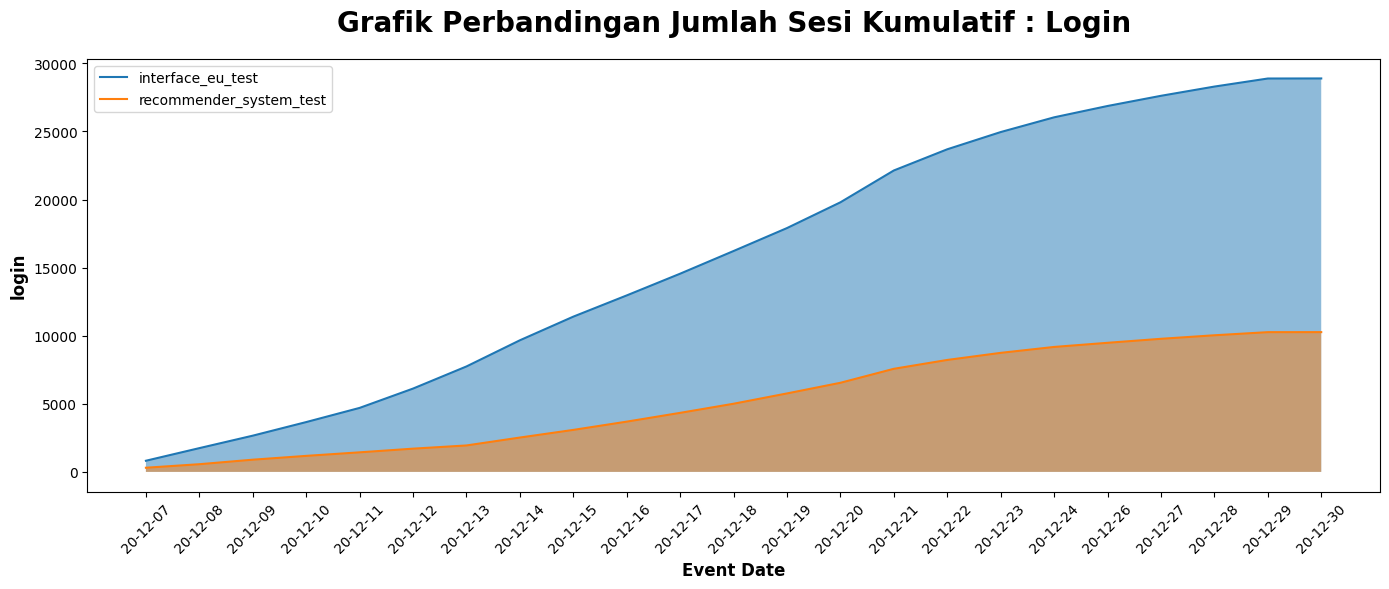

In [111]:
# Identifikasi perbandingan jumlah sesi kumulatif untuk sesi login
create_area_chart('login', 'Grafik Perbandingan Jumlah Sesi Kumulatif : Login', figsize=(14, 6))

Seiring berjalannya waktu, kami mengamati bahwa terdapat perbedaan antara kedua kelompok dalam hal jumlah sesi login yang semakin melebar. Kelompok **interface_eu_test** secara konsisten memiliki jumlah sesi login yang lebih tinggi dibandingkan dengan kelompok **recommender_system_test**

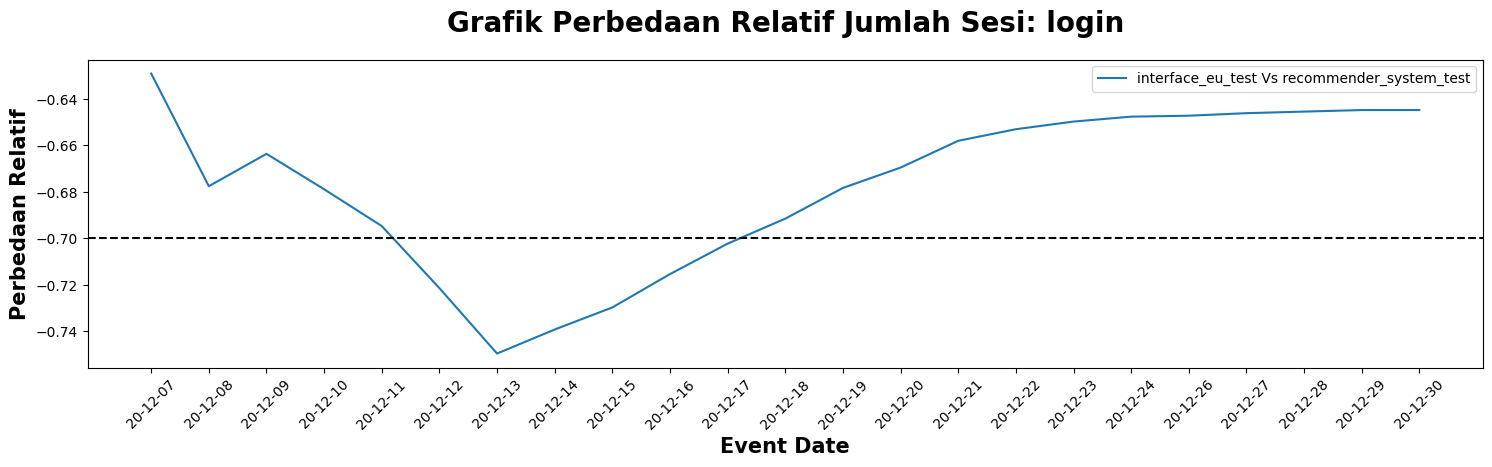

In [112]:
# Identifikasi perbedaan relatif dari sesi pengguna yang masuk ke halaman utama aplikasi (login)
graph_difference_relative('login', -0.7)

Berdasarkan grafik perbedaan relatif, kami dapat menyimpulkan bahwa selama periode **20-12-07** hingga **20-12-30**, kelompok **recommender_system_test** mengalami penurunan yang signifikan dalam hal jumlah sesi pengguna yang login ke aplikasi dibandingkan dengan kelompok **interface_eu_test**

In [113]:
# Uji perbedaan kedua kelompok secara statistik
mannwhitneyu_test('login')

P Value: 0.0
Tolak Hipotesis Null: Terdapat Perbedaan Signifikan Untuk Total Jumlah Sesi Pengguna Dari Kedua Kelompok

Perbedaan Relatif  : -0.645


Kami membuktikan secara statistik bahwa **terdapat perbedaan** total jumlah sesi pengguna yang melakukan login ke aplikasi. Rata-rata jumlah sesi pengunjung yang login untuk Kelompok  recommender_system_test **64.5% lebih rendah** dibandingkan Kelompok interface_eu_test

### **UJI PERBEDAAN STATISTIK UNTUK TOTAL SESI : PRODUCT PAGE**

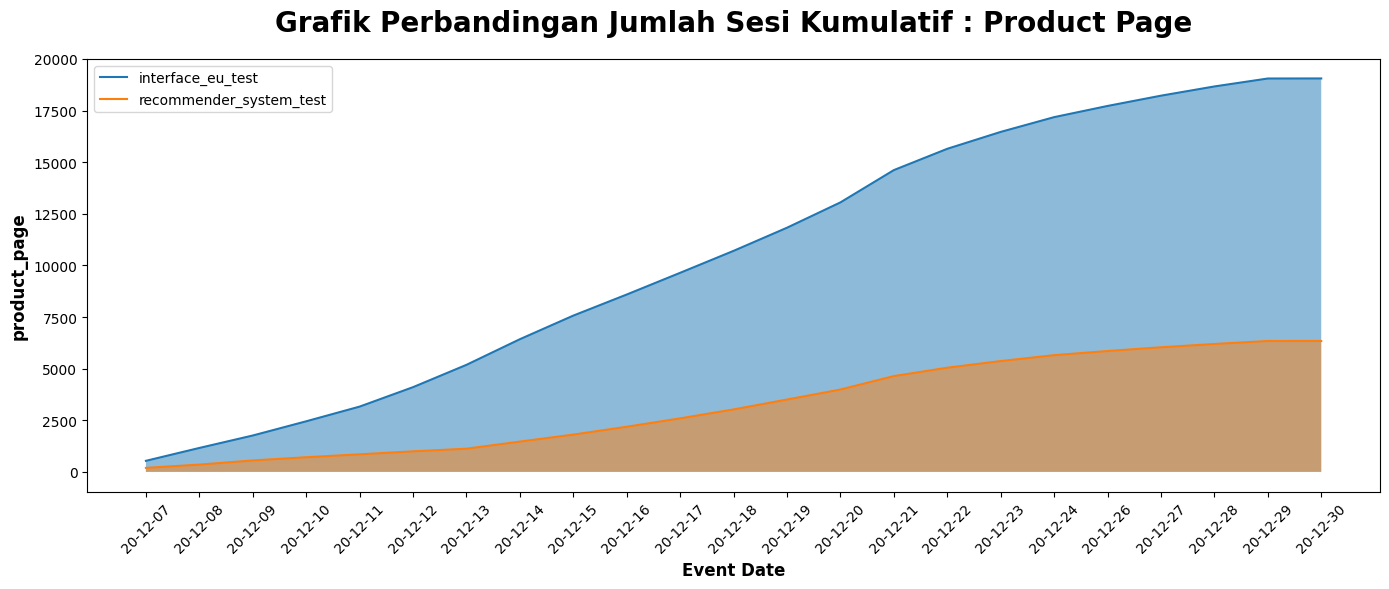

In [114]:
# Identifikasi perbandingan jumlah sesi kumulatif untuk sesi login
create_area_chart('product_page', 'Grafik Perbandingan Jumlah Sesi Kumulatif : Product Page', figsize=(14, 6))

Jumlah sesi pengunjung di halaman utama produk juga teridentifikasi lebih rendah pada kelompok **recommender_system_test** apabila dibandingkan dengan kelompok **interface_eu_test**

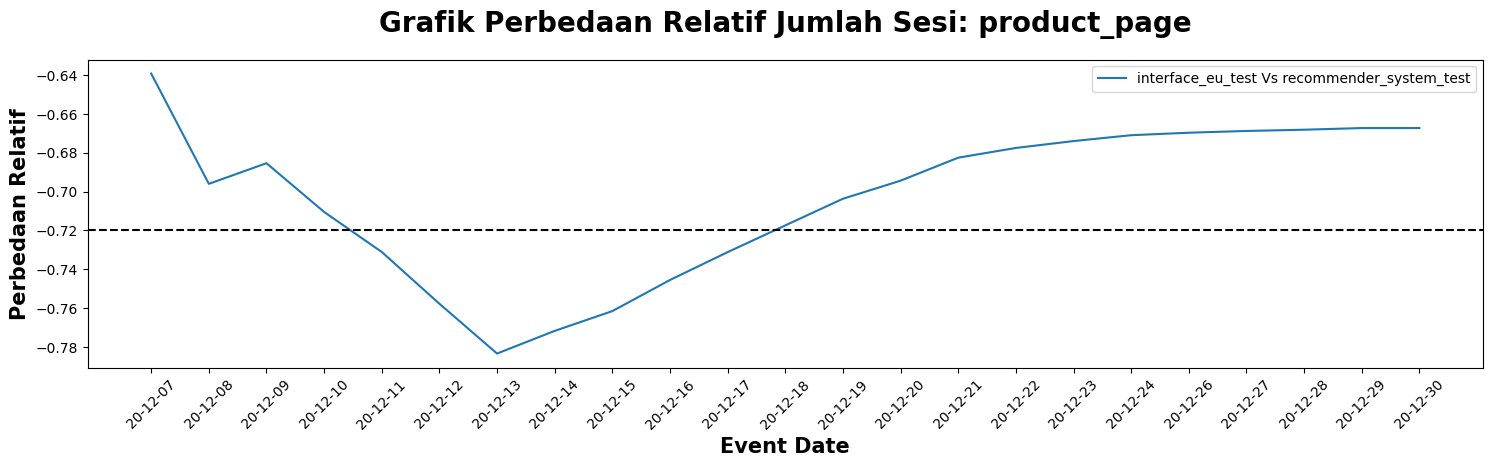

In [115]:
# Identifikasi perbedaan relatif dari sesi pengguna yang masuk ke halaman utama aplikasi (login)
graph_difference_relative('product_page', -0.72)

Grafik perbedaan relatif mengindikasikan bahwa kelompok **recommender_system_test** (pengenalan sistem rekomendasi yang telah ditingkatkan) memiliki **kinerja yang kurang baik** dalam menarik pengguna untuk mengunjungi halaman utama produk (product page) dibandingkan dengan kelompok **interface_eu_test** (sistem rekomendasi yang lama) selama periode analisa

In [116]:
# Uji perbedaan kedua kelompok secara statistik
mannwhitneyu_test('product_page')

P Value: 0.0
Tolak Hipotesis Null: Terdapat Perbedaan Signifikan Untuk Total Jumlah Sesi Pengguna Dari Kedua Kelompok

Perbedaan Relatif  : -0.667


Secara statistik, kami mengidentifikasi adanya **perbedaan dalam hal jumlah sesi pengguna** yang mengunjungi halaman penawaran produk antara kelompok pengguna di aplikasi dengan sistem rekomenasi yang lama vs kelompok pengguna aplikasi dengan sistem rekomendasi yang telah ditingkatkan. Rata-rata jumlah sesi pengunjung yang mengakses halaman penawaran produk untuk kelompok recommender_system_test ternyata **66.7% lebih rendah** dibandingkan kelompok interface_eu_test

### **UJI PERBEDAAN STATISTIK UNTUK TOTAL SESI : PRODUCT CART**

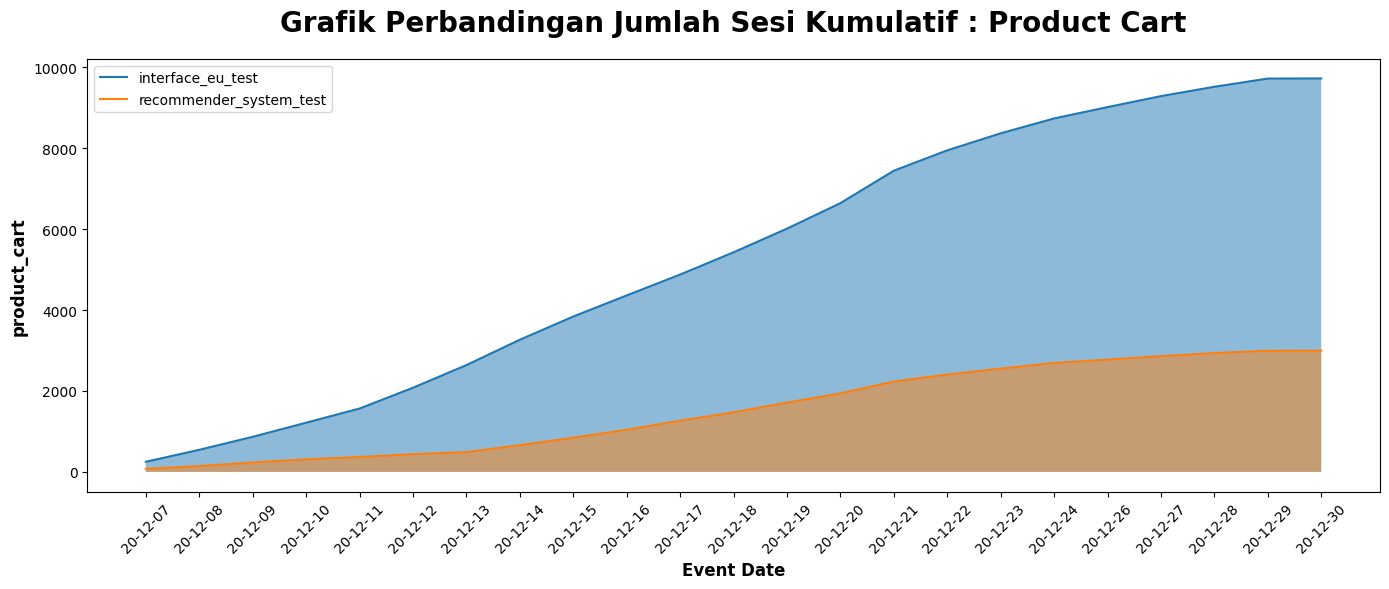

In [117]:
# Identifikasi perbandingan jumlah sesi kumulatif untuk sesi login
create_area_chart('product_cart', 'Grafik Perbandingan Jumlah Sesi Kumulatif : Product Cart', figsize=(14, 6))

Jumlah sesi pengguna yang melakukan penambahan produk ke keranjang belanja terindikasi **lebih rendah untuk kelompok pengguna recomender_system_test** dibandingkan dengan kelompok interface_eu_test

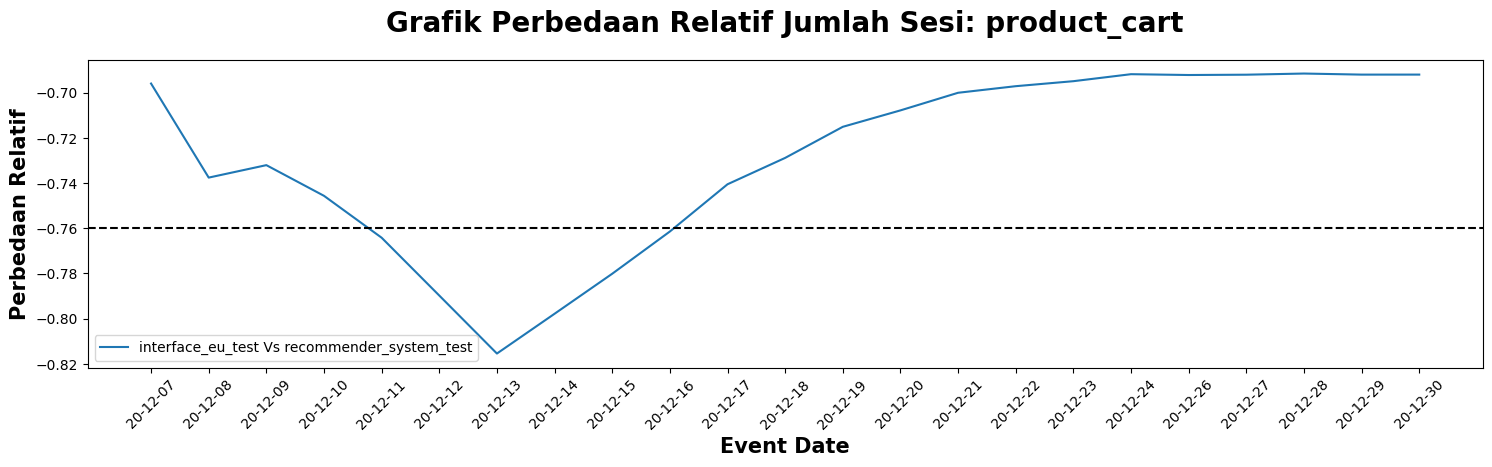

In [118]:
# Identifikasi perbedaan relatif dari sesi pengguna yang masuk ke halaman utama aplikasi (login)
graph_difference_relative('product_cart', -0.76)

Terdapat perbedaan relatif yang signifikan antara kedua kelompok, yang secara keseluruhan menunjukkan **penurunan dalam jumlah sesi product_cart pada kelompok recommender_system_test** dibandingkan dengan kelompok interface_eu_test

In [119]:
# Uji perbedaan kedua kelompok secara statistik
mannwhitneyu_test('product_cart')

P Value: 0.0
Tolak Hipotesis Null: Terdapat Perbedaan Signifikan Untuk Total Jumlah Sesi Pengguna Dari Kedua Kelompok

Perbedaan Relatif  : -0.692


Pengujian statisitk menunjukkan **adanya perbedaan yang signifikan** dari jumlah total sesi pengunjung yang menambahkan produk ke keranjang belanja antara kelompok recommender_system_test terhadap interface_eu_test, dimana rata-rata perbedaannya adalah sebesar **69.2% lebih rendah untuk kelompok recommender_system_test**

### **UJI PERBEDAAN STATISTIK UNTUK TOTAL SESI : PURCHASE**

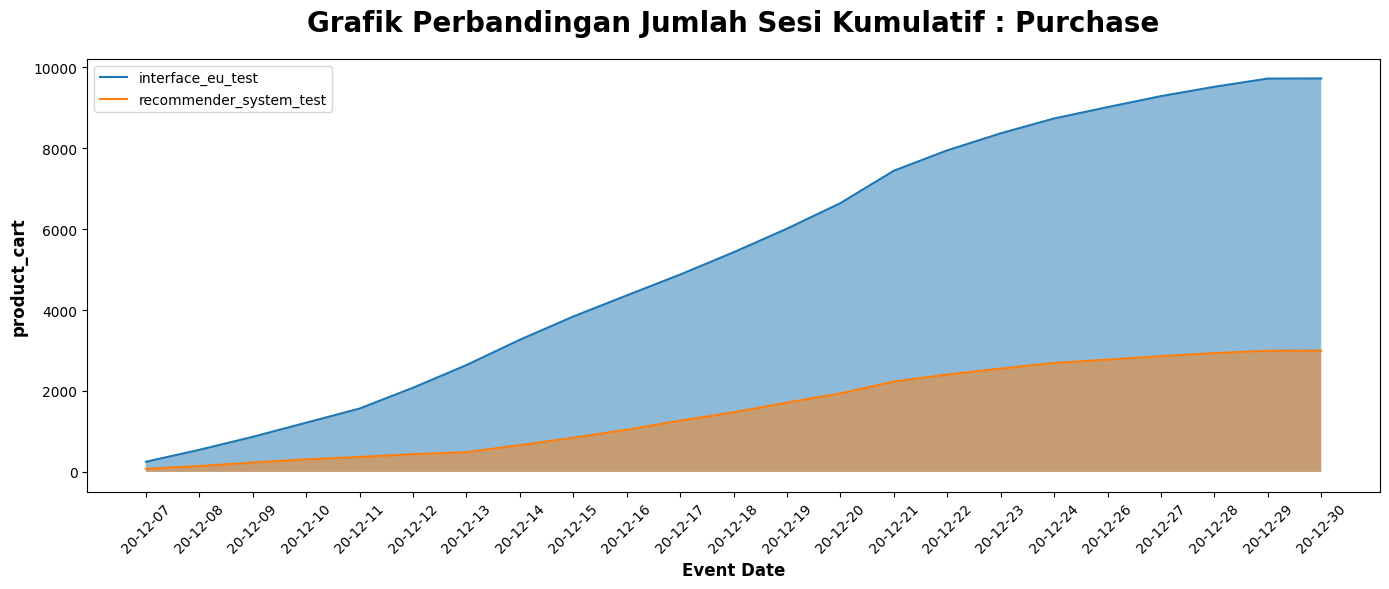

In [120]:
# Identifikasi perbandingan jumlah sesi kumulatif untuk sesi login
create_area_chart('product_cart', 'Grafik Perbandingan Jumlah Sesi Kumulatif : Purchase', figsize=(14, 6))

**Kelompok interface_eu_test memiliki jumlah sesi pembelian kumulatif yang lebih tinggi** daripada kelompok recommender_system_test sepanjang periode pengujian dari tanggal 20-12-07 hingga tanggal 20-12-30

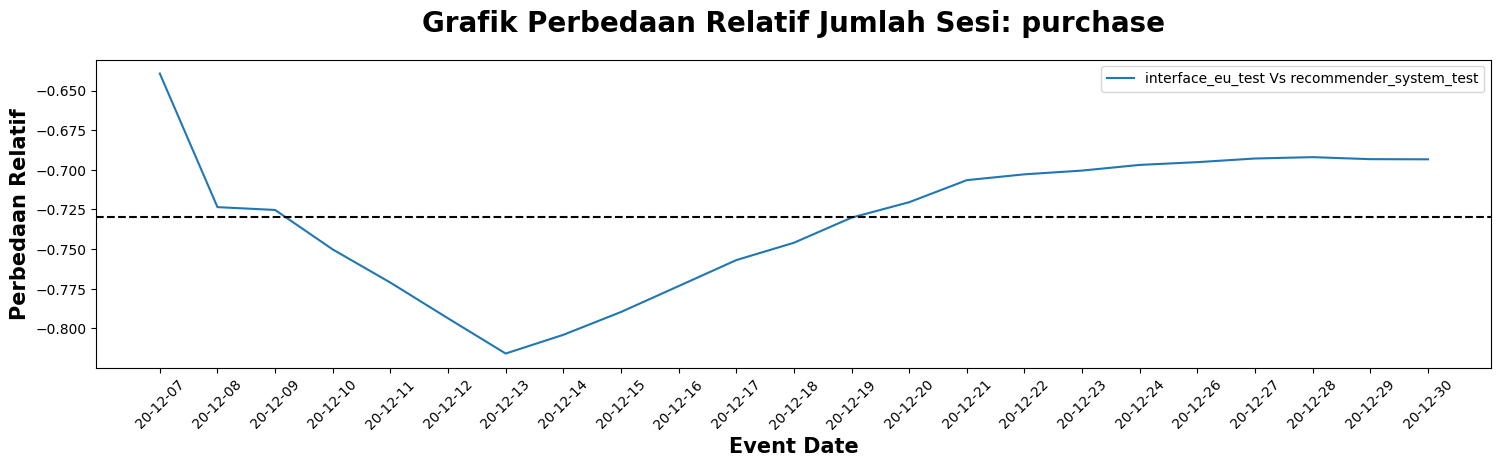

In [121]:
# Identifikasi perbedaan relatif dari sesi pengguna yang masuk ke halaman utama aplikasi (login)
graph_difference_relative('purchase', -0.73)

Perbedaan relatif **terus mengalami penurunan** seiring berjalannya waktu, dengan nilai perbedaan yang semakin mendekati -1. Ini menunjukkan bahwa seiring berjalannya waktu, kelompok "recommender_system_test" secara perlahan mulai mengejar kelompok "interface_eu_test" dalam hal jumlah sesi pembelian. Meskipun kelompok "recommender_system_test" telah mengalami perbaikan seiring berjalannya waktu, mereka masih **memiliki performa yang lebih rendah** dalam hal konversi ke sesi pembelian dibandingkan dengan kelompok "interface_eu_test"

In [122]:
# Uji perbedaan kedua kelompok secara statistik
mannwhitneyu_test('purchase')

P Value: 0.0
Tolak Hipotesis Null: Terdapat Perbedaan Signifikan Untuk Total Jumlah Sesi Pengguna Dari Kedua Kelompok

Perbedaan Relatif  : -0.693


Terdapat perbedaan signifikan dalam total jumlah sesi pembelian antara kedua kelompok. Selain itu, **perbedaan relatif sebesar -0.693** menunjukkan bahwa kelompok "recommender_system_test" memiliki **hampir 70% sesi pembelian yang lebih rendah dibandingkan dengan kelompok "interface_eu_test"**

# **7. TAHAP 5 : KESIMPULAN UMUM**

Dataset yang kami peroleh mencakup periode selama 24 hari, dimulai dari tanggal 07 Desember 2020 hingga 30 Desember 2020. Setelah melakukan seluruh rangkaian proses Pembersihan Data, kami mendapatkan 90.380 baris data (atau 90.380 peristiwa tercatat di datasbase aplikasi perusahaan). Jumlah pengguna yang kami analisa adalah sebanyak 12.440 user yang tersebar di seluruh kawasan Uni Eropa dan yang melakukan registrasi sepanjang periode 2020-12-07 hingga 2020-12-21. Selama tahap uji perbedaan untuk mengidentifikasi apakah terdapat peningkatan minimal 10% dalam hal konversi untuk setiap funnel event (product_page → product_cart → purchase), kami menemukan fakta sebagai berikut :
1. Terdapat perbedaan total jumlah sesi pengguna yang melakukan login ke aplikasi. Rata-rata jumlah sesi pengunjung yang login untuk Kelompok recommender_system_test 64.5% lebih rendah dibandingkan Kelompok interface_eu_test
2. Terdapat perbedaan dalam hal jumlah sesi pengguna yang mengunjungi halaman penawaran produk antara kelompok pengguna di aplikasi dengan sistem rekomenasi yang lama vs kelompok pengguna aplikasi dengan sistem rekomendasi yang telah ditingkatkan. Rata-rata jumlah sesi pengunjung yang mengakses halaman penawaran produk untuk kelompok recommender_system_test ternyata 66.7% lebih rendah dibandingkan kelompok interface_eu_test
3. Terdapat perbedaan dalam total jumlah sesi pembelian antara kedua kelompok, dimana perbedaan relatif sebesar -0.693 menunjukkan bahwa kelompok "recommender_system_test" memiliki hampir 70% sesi pembelian yang lebih rendah dibandingkan dengan kelompok "interface_eu_test"